# Model building On Travel Package Prediction

### Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,classification_report,accuracy_score, confusion_matrix
import pickle
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Ingestion of Data

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\ML_Project\travel\Travel-Package-Purchase-Project-using-CICD-Pipeline-main\data\tour_package.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### EDA And Data Pre-Processing

###### - Checking for the detailed info of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

###### - Statistical discription of data

In [4]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### - Checking for dupicate rows in data

In [5]:
def duplicate (data):
    print("Shape of data before treating duplicate records = ", data.shape)
    dupli = data[data.duplicated() == True]
    print('shape of duplicate data = ', dupli.shape)
    if dupli.shape[0] > 0:
        df = df.drop_duplicates()
        print("Shape of data after treating duplicate records = ", df.shape)
    else:
        df = data
        print()
        print(">>>>>>>> As there are no duplicate rows in the dataset so the  <<<<<<<<")
        print("                   Shape of data = ", df.shape)
        
        

duplicate(df)

Shape of data before treating duplicate records =  (4888, 20)
shape of duplicate data =  (0, 20)

>>>>>>>> As there are no duplicate rows in the dataset so the  <<<<<<<<
                   Shape of data =  (4888, 20)


### - Droping of unique column

In [6]:
print(df.shape)
df = df.drop(columns=['CustomerID'], axis = 1)
print(df.shape)

(4888, 20)
(4888, 19)


### - Value count for Categorical and numerical columns

In [7]:
categorical_feat = df.select_dtypes(include = 'O').columns
numerical_feat = df.select_dtypes(exclude = 'O').columns
print("Categorical Features")
print()
print(categorical_feat)
print("----------------------------------------------------------------------------------------------------------------------")
print("Numerical Features")
print()
print(numerical_feat)

Categorical Features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------
Numerical Features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


###### - Value count for categorical features

In [8]:
for i in categorical_feat:
    print(i)
    print("--------------------------------------------------------------------------------------------------------------------")
    print(df[i].value_counts())
    print()

TypeofContact
--------------------------------------------------------------------------------------------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Occupation
--------------------------------------------------------------------------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Gender
--------------------------------------------------------------------------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

ProductPitched
--------------------------------------------------------------------------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

MaritalStatus
-----------------------------------------------

### - Here unmarried and single are same and female and fe male are same so we need to handle them firstly 


In [9]:
df["Gender"]=np.where(df["Gender"]=="Fe Male","Female",df["Gender"])
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [10]:
df["MaritalStatus"]=np.where(df["MaritalStatus"]=="Single","Unmarried",df["MaritalStatus"])
df.MaritalStatus.value_counts()

Married      2340
Unmarried    1598
Divorced      950
Name: MaritalStatus, dtype: int64

### - Handeling of null values in the dataset

###### - Seperating discrete and continuous columns 

In [11]:
unique_value_threshold = 10
discrete_columns = []
continuous_columns = []
for column in df.columns:
    unique_count = df[column].nunique()
    if unique_count <= unique_value_threshold:
        discrete_columns.append(column)
    else:
        continuous_columns.append(column)

print("                             >>>>>>>> Getting discrete and continuous column names <<<<<<<<")
print("_______________________________________________________________________________________________________________________________")
print("Discrete columns:")
print("-------------------------------------------")
print(discrete_columns)

print()
print("Continuous_columns:")
print("-------------------------------------------")
print(continuous_columns)


                             >>>>>>>> Getting discrete and continuous column names <<<<<<<<
_______________________________________________________________________________________________________________________________
Discrete columns:
-------------------------------------------
['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

Continuous_columns:
-------------------------------------------
['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


###### - Checking for missing values

In [12]:
dis_miss_values = []
conti_miss_values = []

for i in discrete_columns:
    dis = df[i].isnull().sum()
    if dis > 0:
        dis_miss_values.append(i)

for j in continuous_columns:
    con = df[j].isnull().sum()
    if con > 0:
        conti_miss_values.append(j)

        
if len(dis_miss_values) == 0 & len(conti_miss_values) == 0:
    print("No missing values in discrete and continuous columns")
else:
    print("                   >>>>>>>> Getting discrete and continuous columns names containing Null Values: <<<<<<<<")
    print("_______________________________________________________________________________________________________________________________")
    print("Discrete columns containing null values:")
    print("-------------------------------------------")
    print()
    print(dis_miss_values)    
    print()
    print("Continuous columns containing null values:")
    print("-------------------------------------------")
    print()
    print(conti_miss_values)

                   >>>>>>>> Getting discrete and continuous columns names containing Null Values: <<<<<<<<
_______________________________________________________________________________________________________________________________
Discrete columns containing null values:
-------------------------------------------

['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']

Continuous columns containing null values:
-------------------------------------------

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


###### - Filling of null values for discrete variables

In [13]:
for i in dis_miss_values:
    print(">>>>>>>> Value counts for the discrete columns that containing null values before filling null values <<<<<<<<")
    print("______________________________________________________________________________________________________________________________")
    print("------ ",i," ------")
    print()
    print(df[i].value_counts())
    print()
    df[i].fillna(df[i].value_counts().index[0], inplace=True)
    print(">>>>>>>> Value counts for the discrete columns that containing null values after filling null values <<<<<<<<")
    print("______________________________________________________________________________________________________________________________")
    print("------ ",i," ------")
    print()
    print(df[i].value_counts())
    print()

>>>>>>>> Value counts for the discrete columns that containing null values before filling null values <<<<<<<<
______________________________________________________________________________________________________________________________
------  TypeofContact  ------

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

>>>>>>>> Value counts for the discrete columns that containing null values after filling null values <<<<<<<<
______________________________________________________________________________________________________________________________
------  TypeofContact  ------

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

>>>>>>>> Value counts for the discrete columns that containing null values before filling null values <<<<<<<<
______________________________________________________________________________________________________________________________
------  NumberOfFollowups  ------

4.0    2068
3.0    1466


###### - Filling of null values for continuous variables

In [14]:
for i in conti_miss_values:
    print(">>>>>>>> Value counts for the continuous columns that containing null values before filling null values <<<<<<<<")
    print("______________________________________________________________________________________________________________________________")
    print("------ ",i," ------")
    print()
    print("Mean = ",df[i].mean())
    print()
    df[i].fillna(df[i].mean(), inplace=True)
    print(">>>>>>>> Value counts for the continuous columns that containing null values after filling null values <<<<<<<<")
    print("______________________________________________________________________________________________________________________________")
    print("------ ",i," ------")
    print()
    print("Mean = ",df[i].mean())
    print()

>>>>>>>> Value counts for the continuous columns that containing null values before filling null values <<<<<<<<
______________________________________________________________________________________________________________________________
------  Age  ------

Mean =  37.62226512226512

>>>>>>>> Value counts for the continuous columns that containing null values after filling null values <<<<<<<<
______________________________________________________________________________________________________________________________
------  Age  ------

Mean =  37.62226512226513

>>>>>>>> Value counts for the continuous columns that containing null values before filling null values <<<<<<<<
______________________________________________________________________________________________________________________________
------  DurationOfPitch  ------

Mean =  15.490834591330602

>>>>>>>> Value counts for the continuous columns that containing null values after filling null values <<<<<<<<
____________

In [15]:
dis_miss_values = []
conti_miss_values = []

for i in discrete_columns:
    dis = df[i].isnull().sum()
    if dis > 0:
        dis_miss_values.append(i)

for j in continuous_columns:
    con = df[j].isnull().sum()
    if con > 0:
        conti_miss_values.append(j)

        
if len(dis_miss_values) == 0 & len(conti_miss_values) == 0:
    print("No missing values in discrete and continuous columns")
else:
    print("                   >>>>>>>> Getting discrete and continuous columns names containing Null Values: <<<<<<<<")
    print("_______________________________________________________________________________________________________________________________")
    print("Discrete columns containing null values:")
    print("-------------------------------------------")
    print()
    print(dis_miss_values)    
    print()
    print("Continuous columns containing null values:")
    print("-------------------------------------------")
    print()
    print(conti_miss_values)

No missing values in discrete and continuous columns


### - Visulization of each categorical features

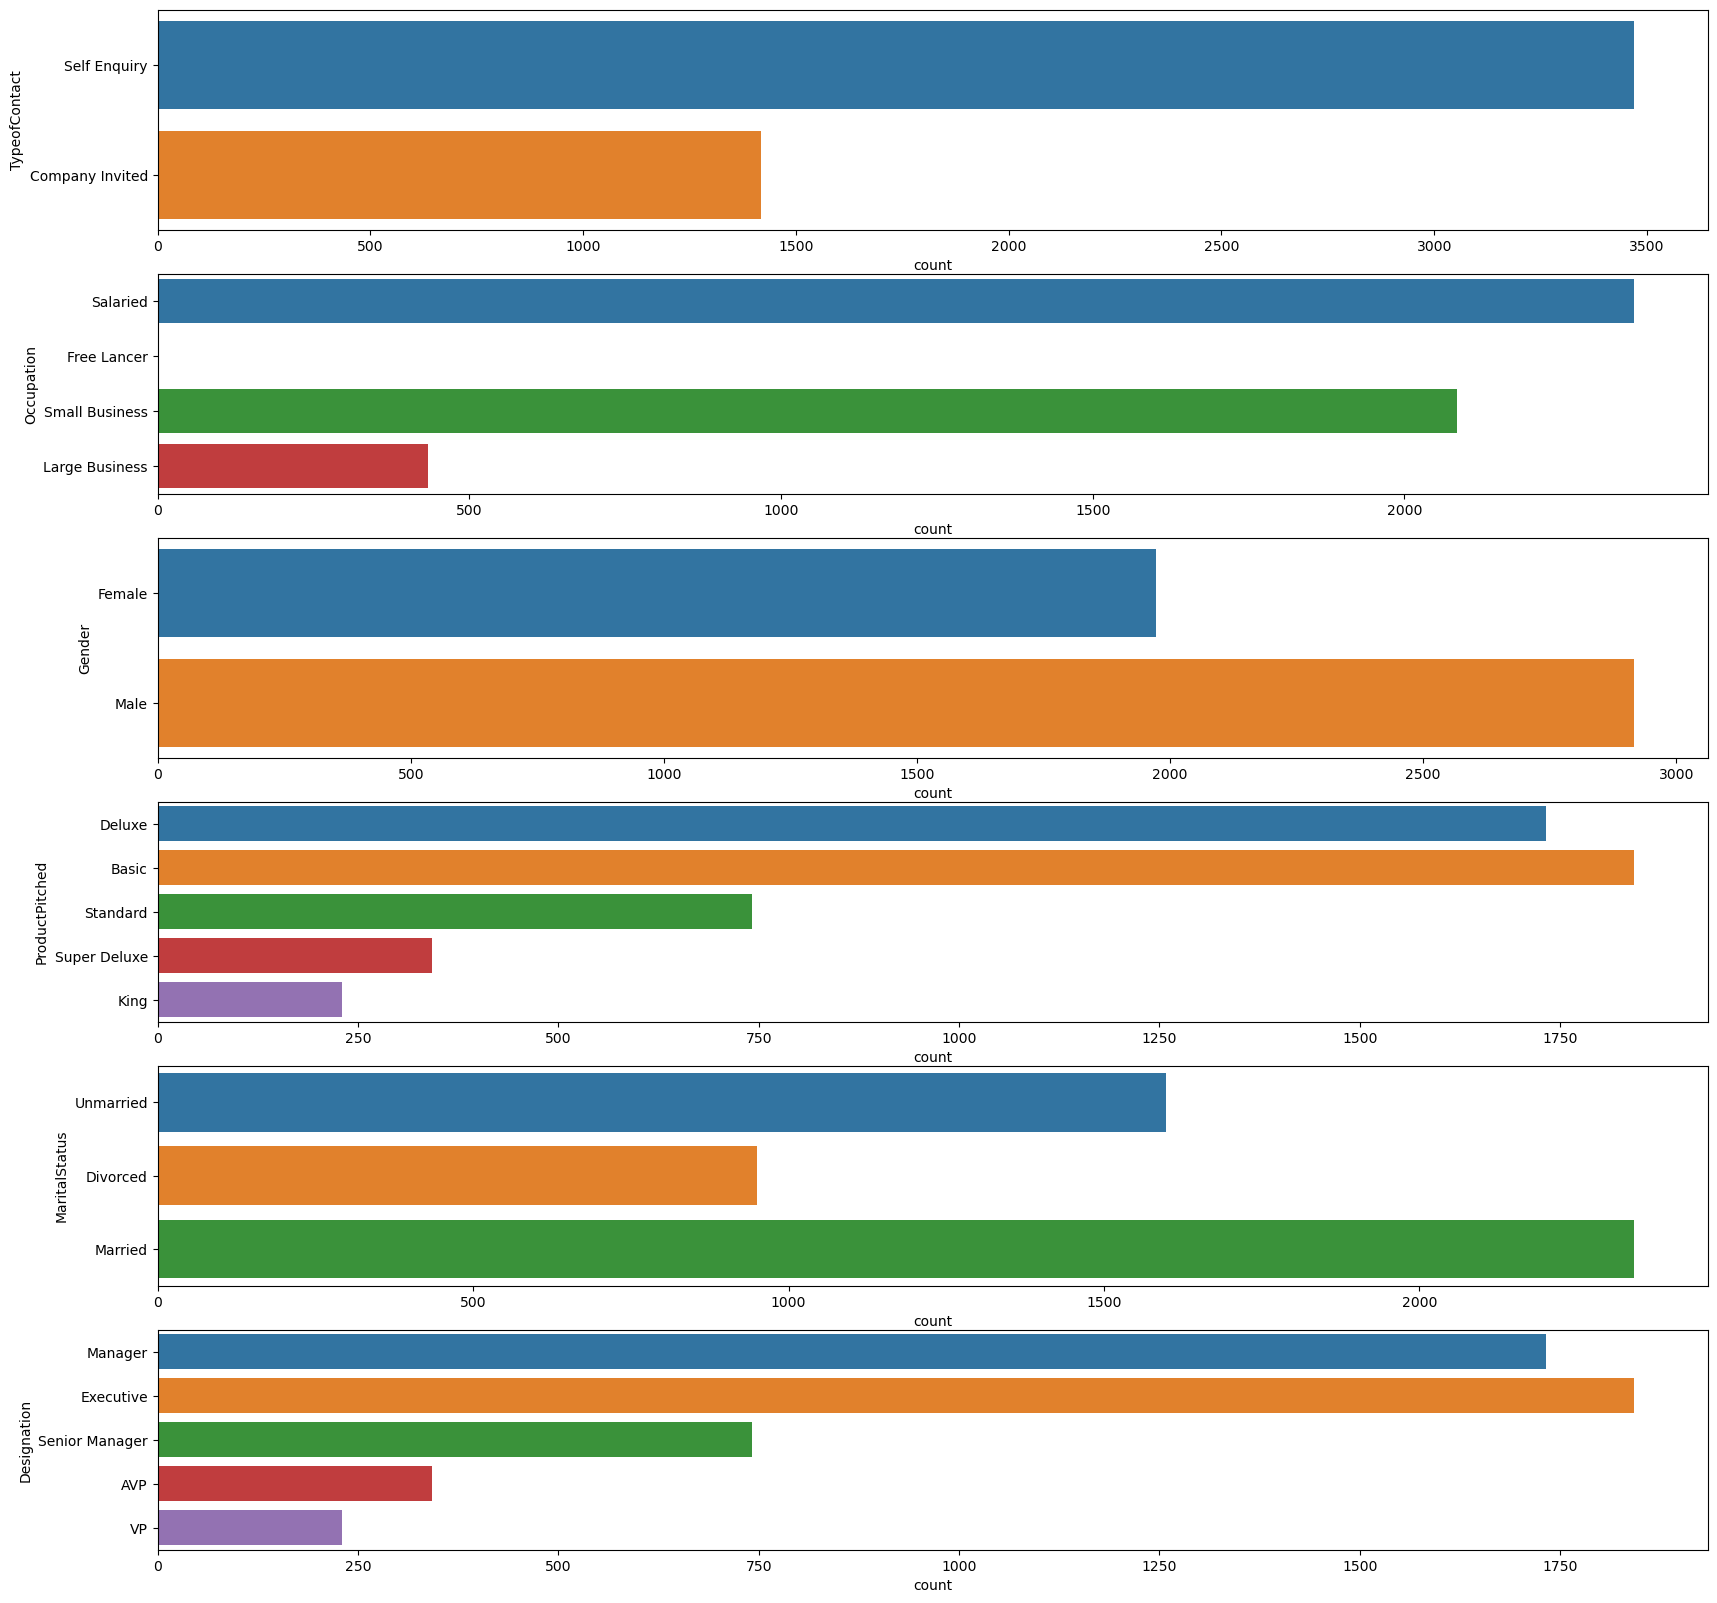

In [16]:
fig, ax= plt.subplots(6, figsize=(20,20), facecolor='w', edgecolor='k')
for i in range(len(categorical_feat)):
    sns.countplot(y=df[categorical_feat[i]],ax=ax[i])
#plt.savefig('countplot_categorical_features.png')

### Observation:
1. **Self Enquiry** is has been done by most of the customers
2. Most of the Customers are **Salaried and Small Bussiness**.
3. **Male** customer are **more** than **female** customers
4. From the Productpitched **Basic** has been taken most wheather **King** very less.
5. Most of the Customer are **Married**.
6. Destination of Most of the Customer is **Executive** and **Manager** and Less is **VP**.

### - Visulization of each categorical features with target variable [prodtaken]

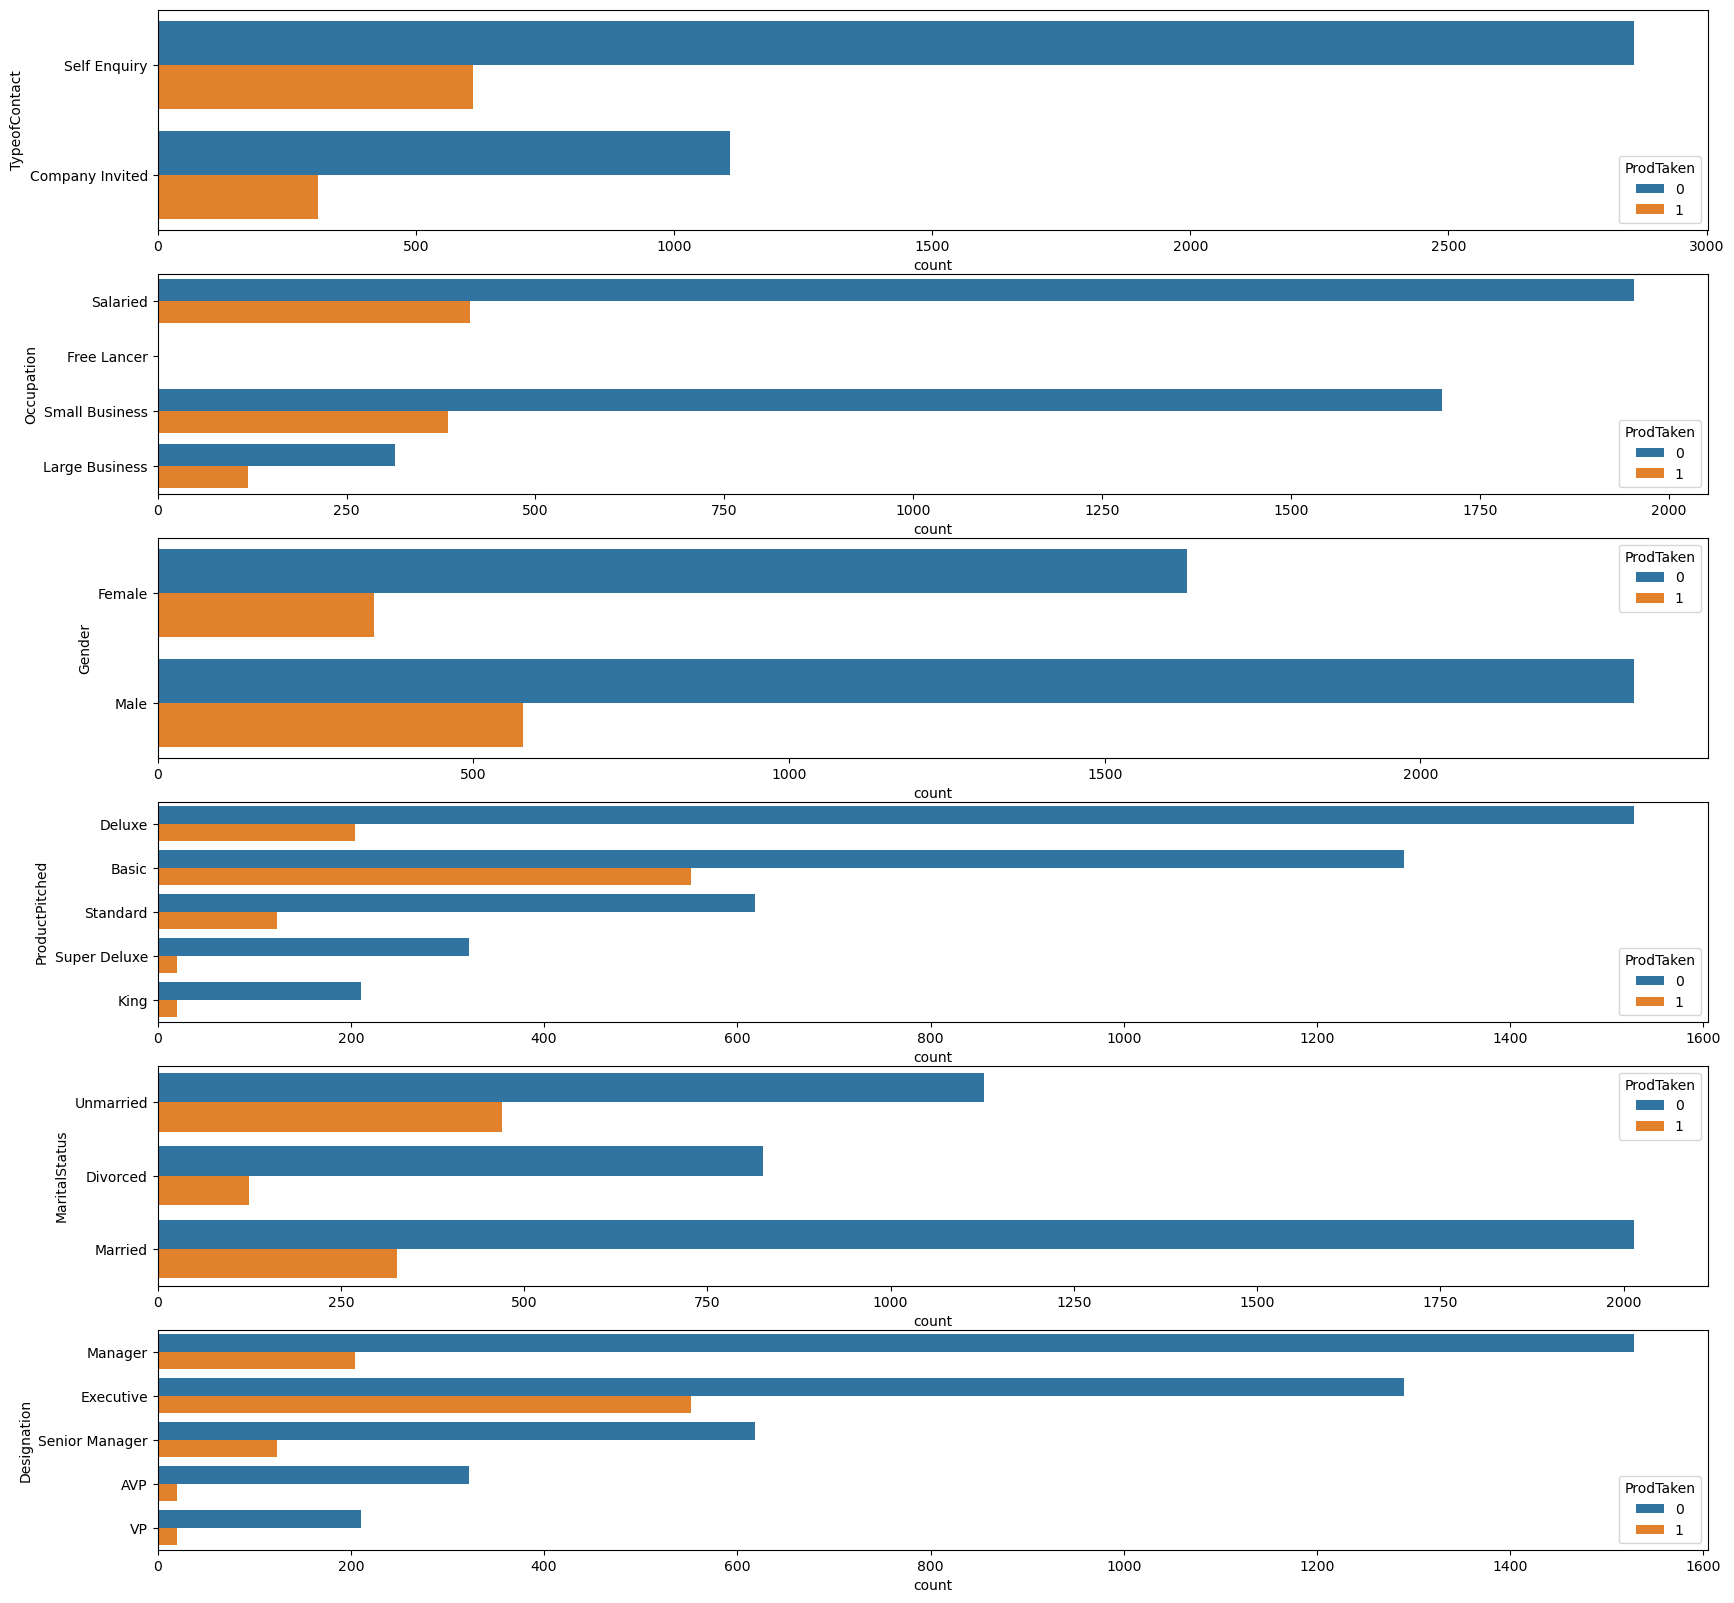

In [17]:
fig, ax= plt.subplots(6, figsize=(20,20), facecolor='w', edgecolor='k')
for i in range(len(categorical_feat)):
    sns.countplot(y=df[categorical_feat[i]],ax=ax[i],hue=df["ProdTaken"])
#plt.savefig(f'countplot_categorical_features_w_target_variable.png')

### Observation:

1. **Basic product Pitch**  Purchase More packages compare with their count.
2.  **Unmarried**  Purchase More packages compare with their count.
3.  **Manager**  Purchase More packages compare with their count.
4. Rest of all are purchasing package in very normal according to their count.

###### - Value count for numerical Features

In [18]:
for i in numerical_feat:
    print(i)
    print("--------------------------------------------------------------------------------------------------------------------")
    print(df[i].value_counts())
    print()

ProdTaken
--------------------------------------------------------------------------------------------------------------------
0    3968
1     920
Name: ProdTaken, dtype: int64

Age
--------------------------------------------------------------------------------------------------------------------
35.000000    237
36.000000    231
37.622265    226
34.000000    211
31.000000    203
30.000000    199
32.000000    197
33.000000    189
37.000000    185
29.000000    178
38.000000    176
41.000000    155
39.000000    150
28.000000    147
40.000000    146
42.000000    142
27.000000    138
43.000000    130
46.000000    121
45.000000    116
26.000000    106
44.000000    105
51.000000     90
47.000000     88
50.000000     86
25.000000     74
52.000000     68
53.000000     66
49.000000     65
48.000000     65
55.000000     64
54.000000     61
56.000000     58
24.000000     56
23.000000     46
22.000000     46
59.000000     44
21.000000     41
20.000000     38
19.000000     32
58.000000     31
57.0

###### - As MonthlyIncome also has more varriation so we can handel them by grouping with target variable
###### - Some features like Age and DurationOfPitch has more category, for the observation we can simply categorice  in some range

In [19]:
unique_value_threshold = 10
dict_columns = []
conti_columns = []
for column in numerical_feat:
    unique_count = df[column].nunique()
    if unique_count <= unique_value_threshold:
        dict_columns.append(column)
    else:
        conti_columns.append(column)

print("                             >>>>>>>> Getting discrete and continuous column names <<<<<<<<")
print("_______________________________________________________________________________________________________________________________")
print("Discrete columns:")
print("-------------------------------------------")
print(dict_columns)

print()
print("Continuous_columns:")
print("-------------------------------------------")
print(conti_columns)

                             >>>>>>>> Getting discrete and continuous column names <<<<<<<<
_______________________________________________________________________________________________________________________________
Discrete columns:
-------------------------------------------
['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

Continuous_columns:
-------------------------------------------
['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


### - Visulization of each numerical features

In [20]:
print('Visulization of MonthlyIncome column')
print()
df.groupby("ProdTaken")["MonthlyIncome"].sum()

Visulization of MonthlyIncome column



ProdTaken
0    9.500854e+07
1    2.044531e+07
Name: MonthlyIncome, dtype: float64

###### 1) Visulization for continuous column with Target variable

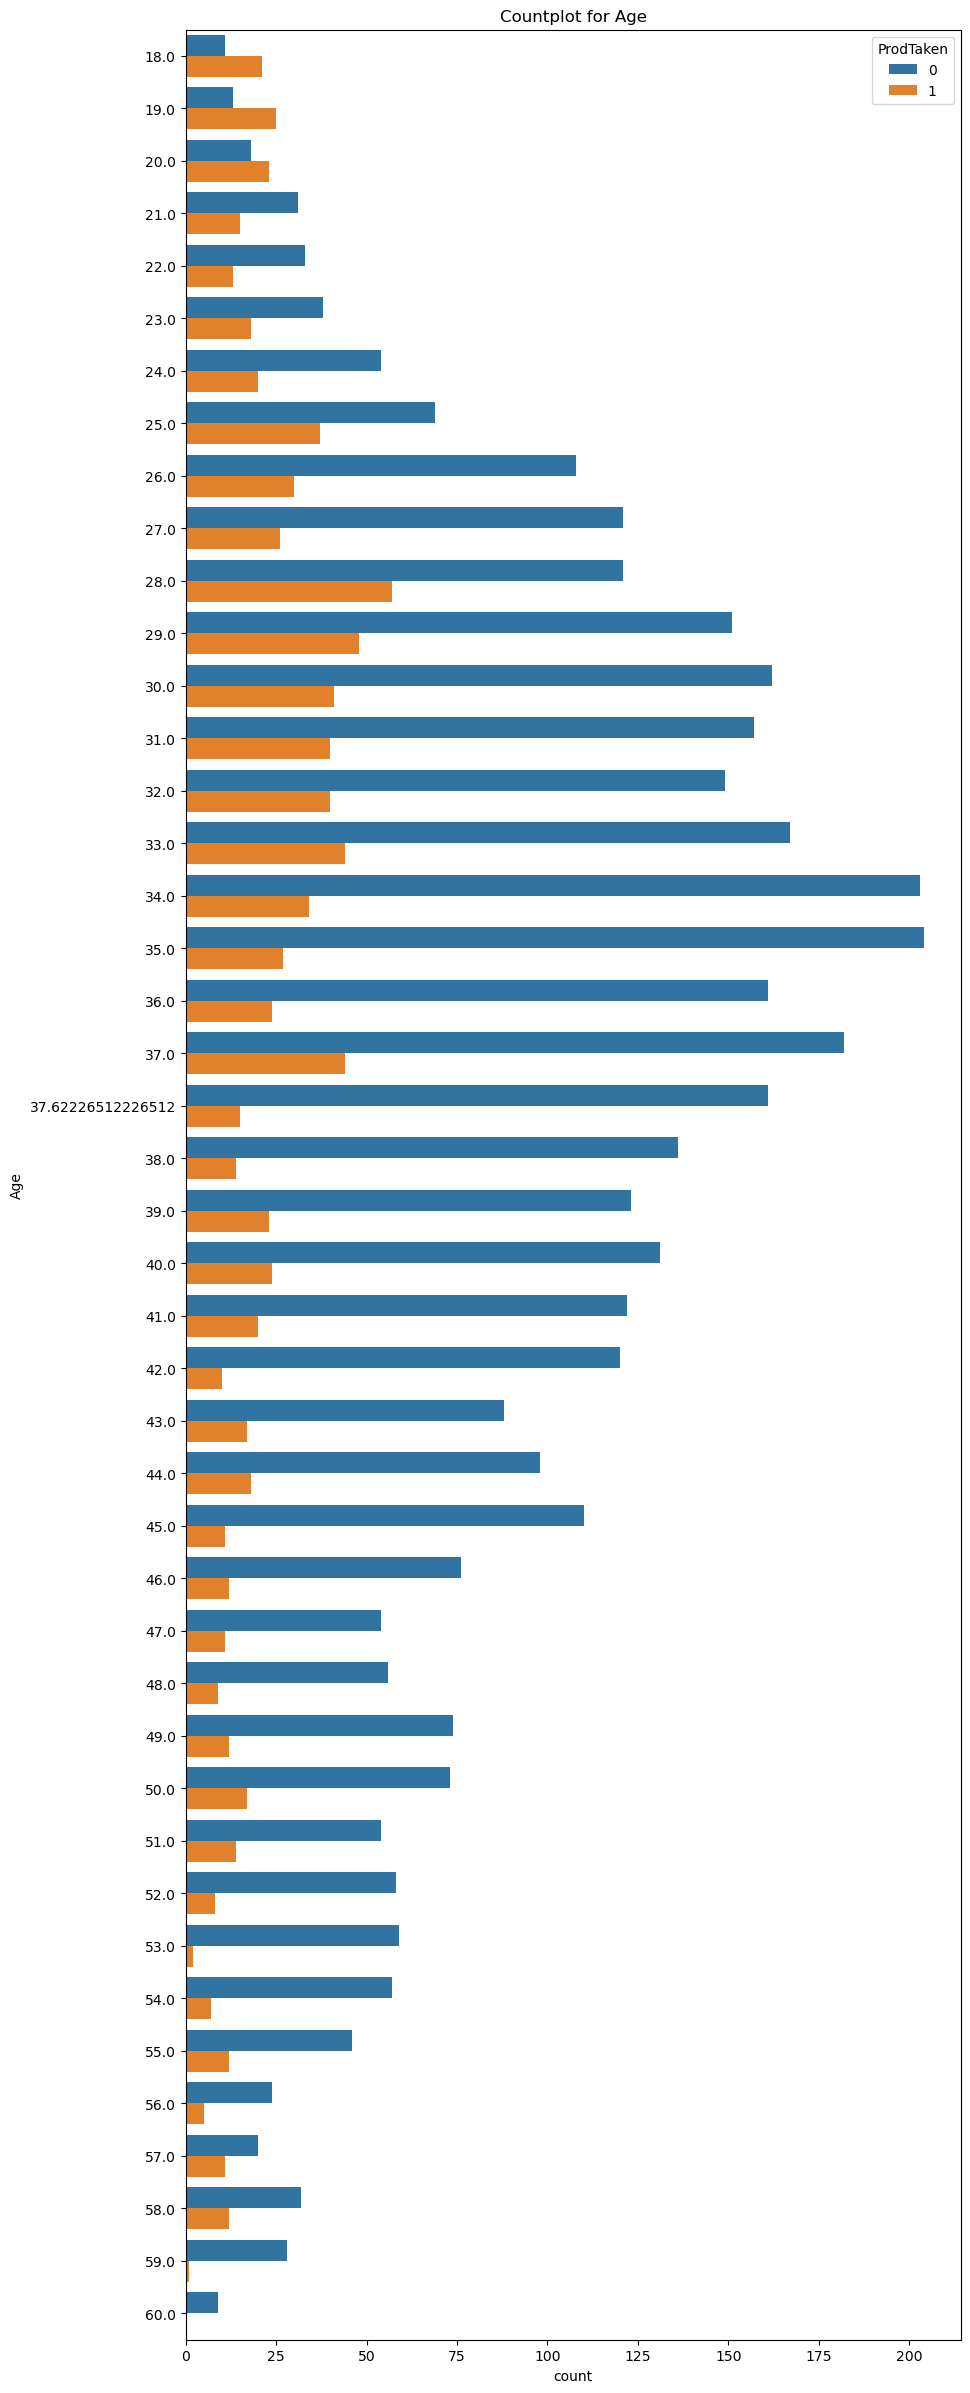

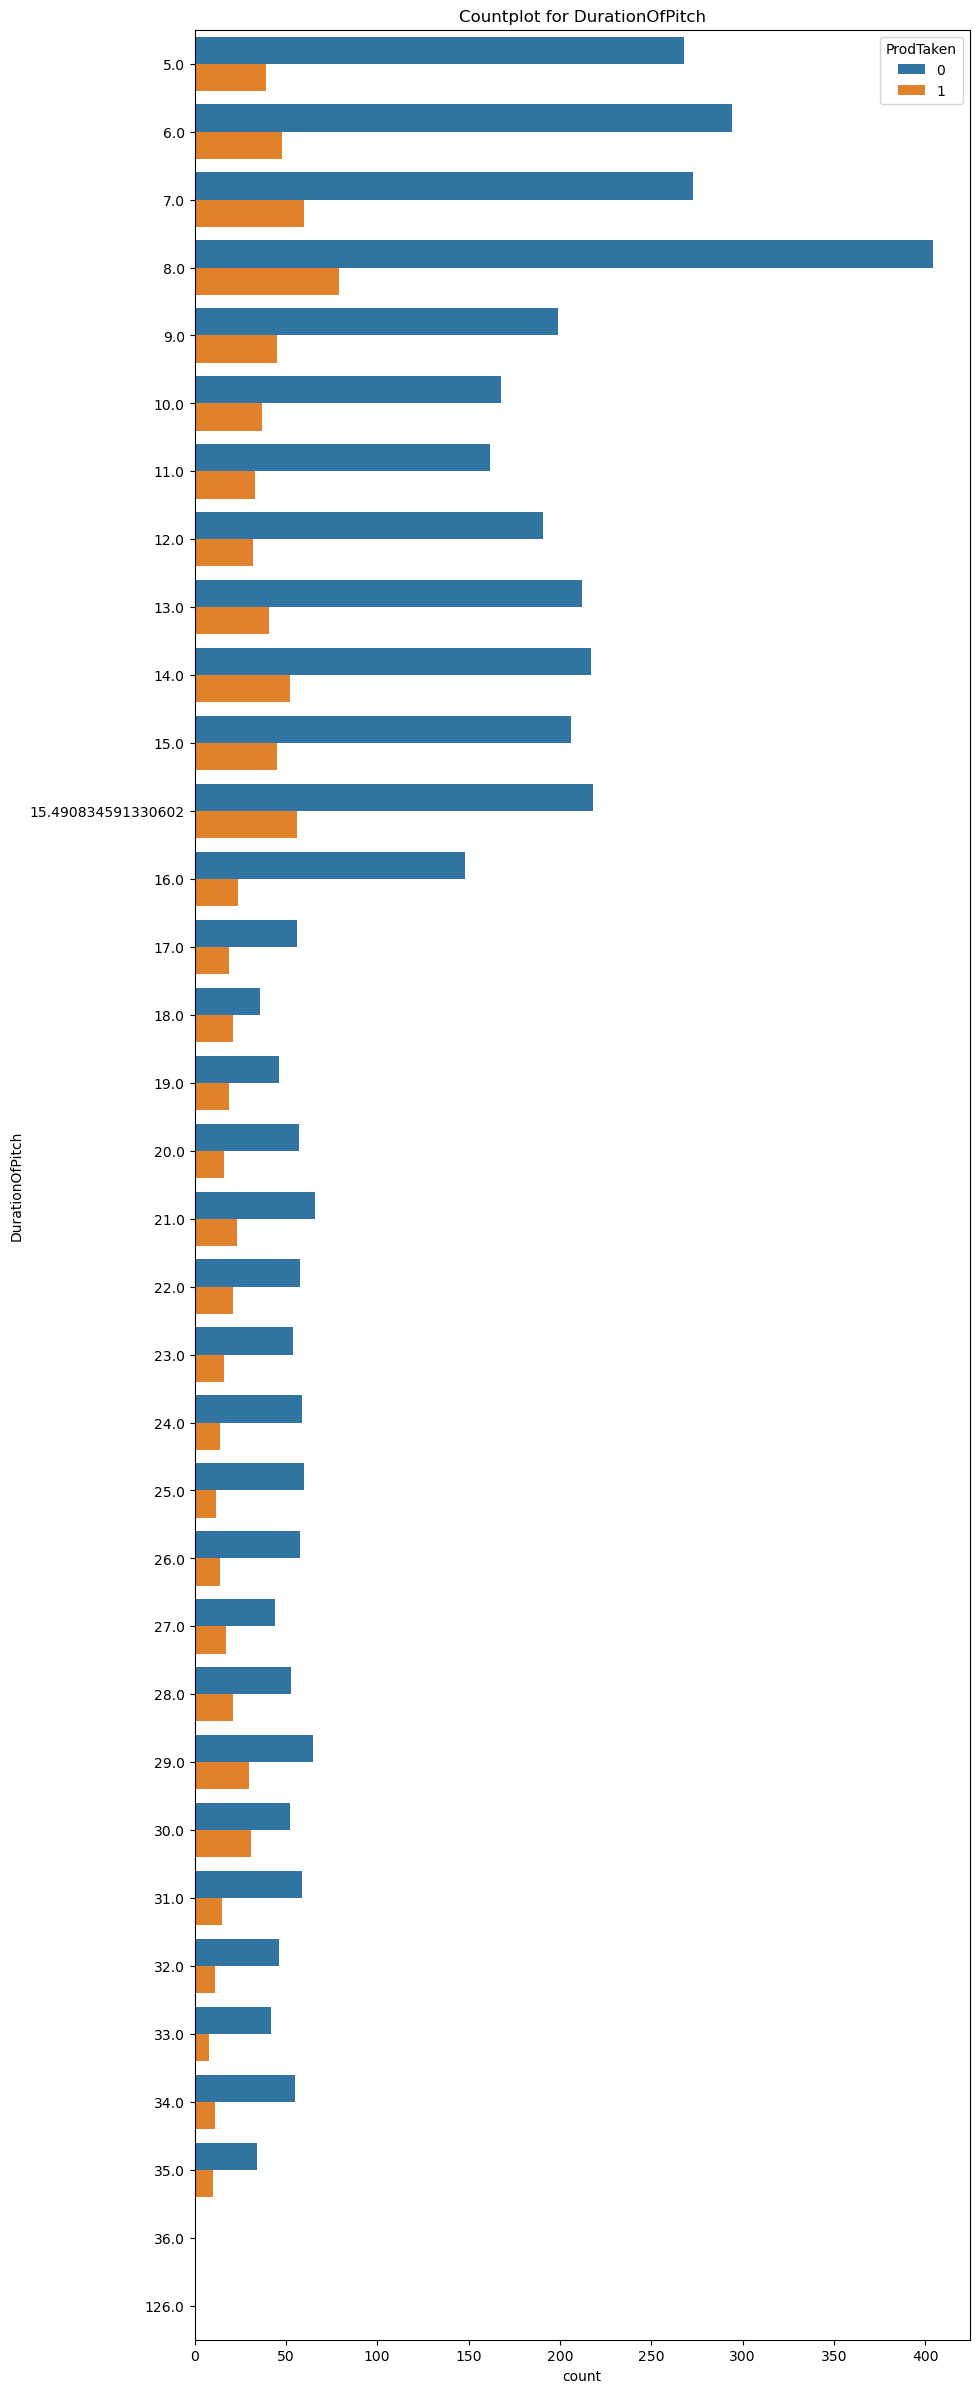

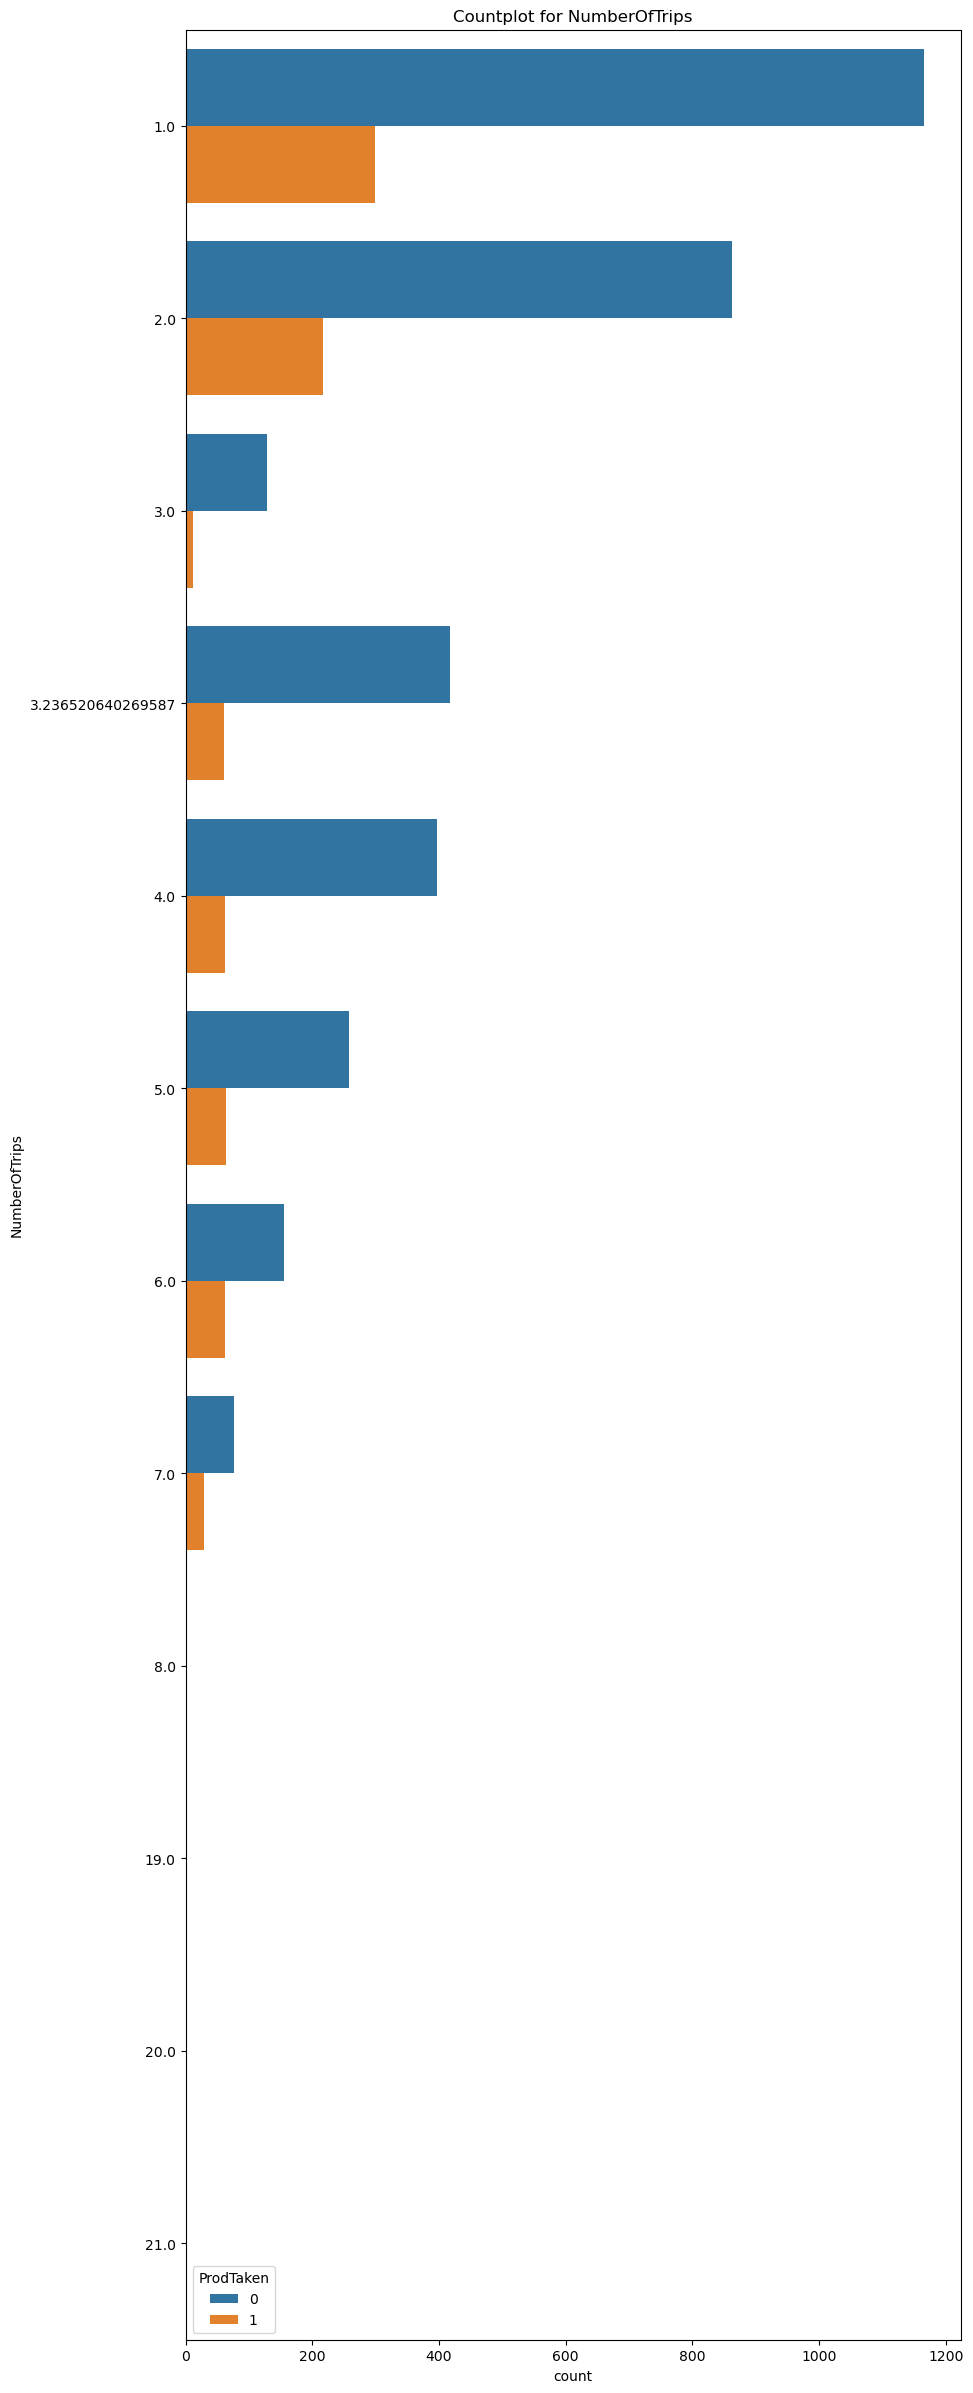

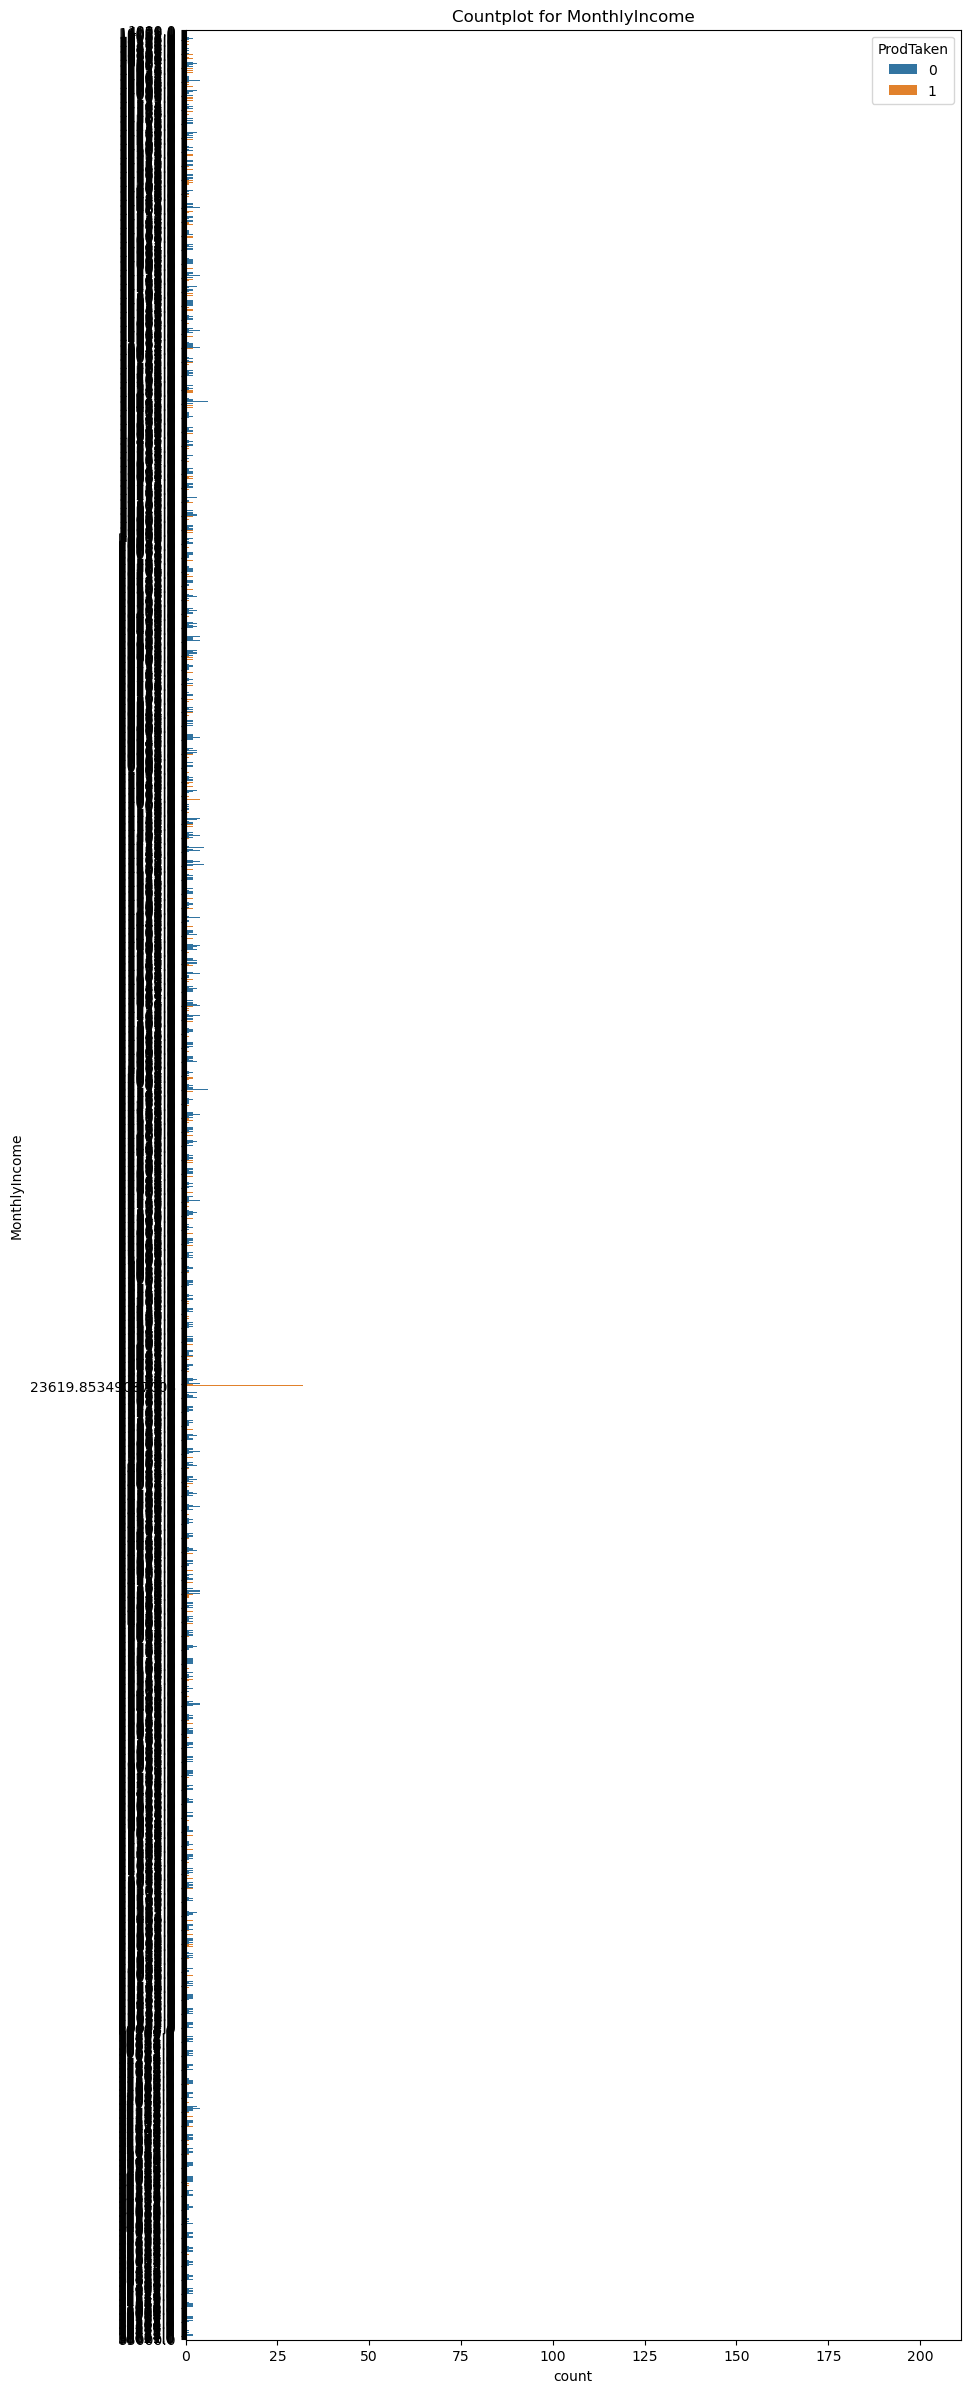

In [21]:
for i in conti_columns:
    unique_values = sorted(df[i].unique())  
    num_bins = len(unique_values)
    bin_edges = [unique_values[x] for x in range(num_bins)]
    bin_labels = [f"{unique_values[x]}" for x in range(num_bins - 1)]

    j = pd.cut(x=df[i], bins=bin_edges, labels=bin_labels)
    
    plt.figure(figsize=(10, 30))  
    sns.countplot(data=df, hue="ProdTaken", y=j)
    plt.title(f'Countplot for {i}')
    #plt.savefig(f'countplot_{i}.png')
    plt.show()

### Observation :
    
Most of the customers between **26-35** age and **36-45** age group purchase the package most 

### Observations :
    
1. Most Customer are from duration of 5-15 Duration of Pitch
2. Best rate of purchasing Package is from 25-35 Duration of Pitch

### Observations :

- 3 and 2 is a  category of the NumberOfPersonVisiting  which has been Purchae the package

### Visulization for discrete columns with Target variable

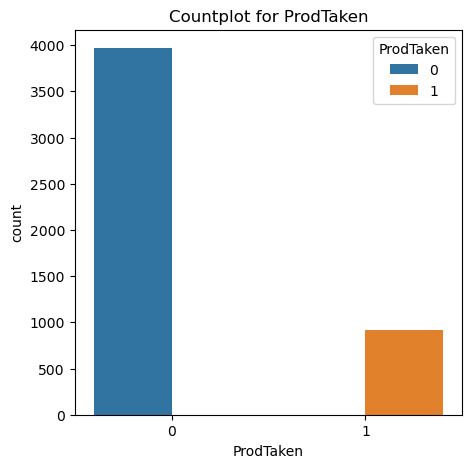

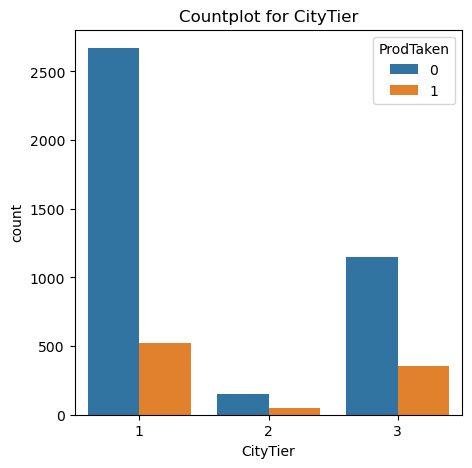

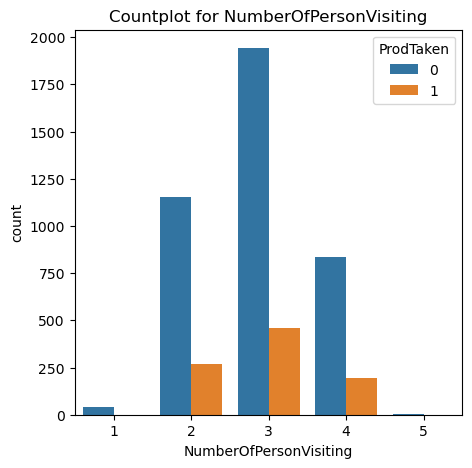

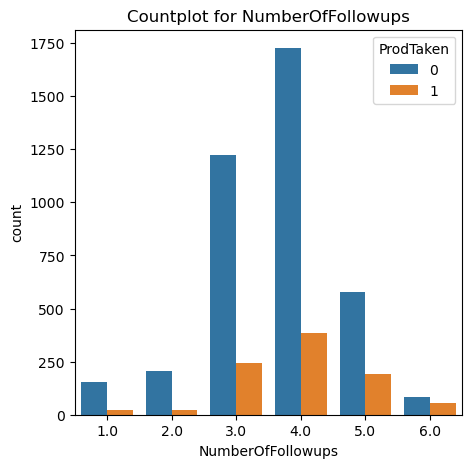

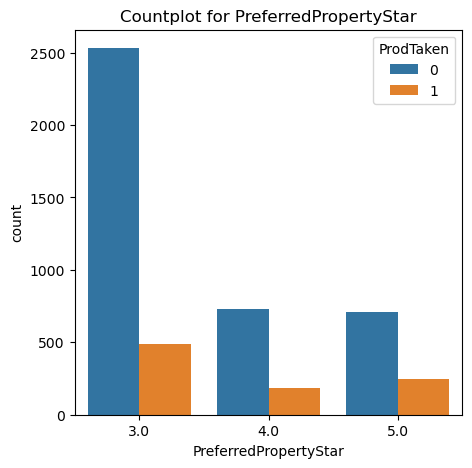

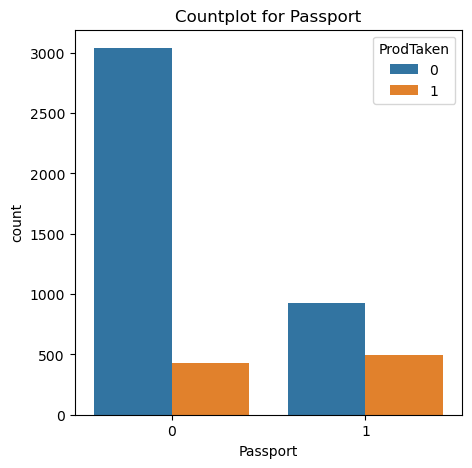

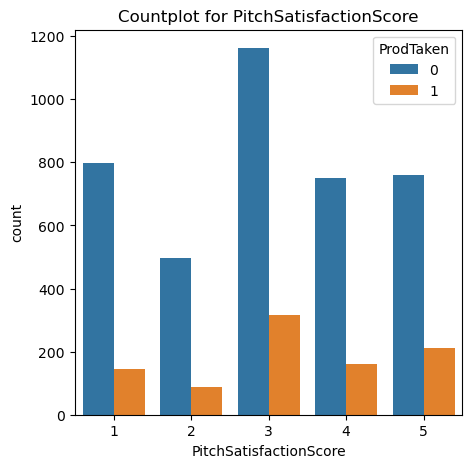

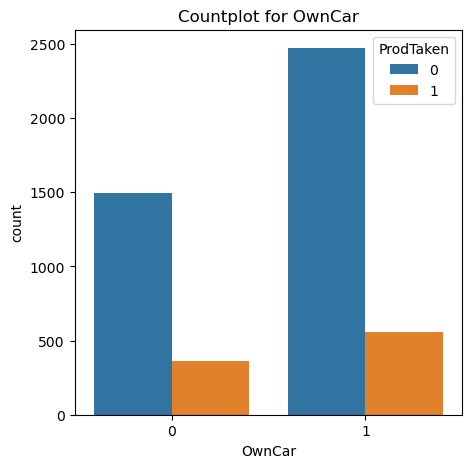

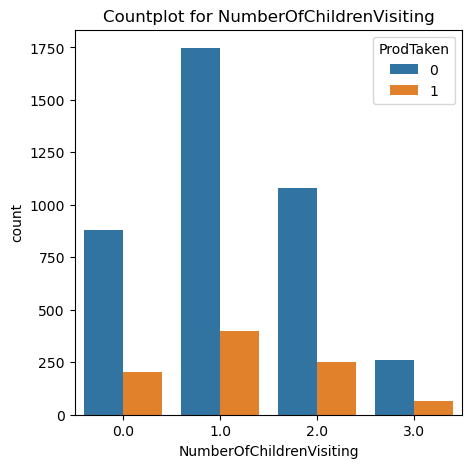

In [22]:
for i in dict_columns:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(data=df, hue="ProdTaken", x=i)
    plt.title(f'Countplot for {i}')
    #plt.savefig(f'countplot_{i}.png')
    plt.show()

In [23]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


### Handeling of categorical data

###### Handeling of ordinal data

- As our Desigination variable is ordinal

In [24]:
df.Designation.value_counts().index

Index(['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'], dtype='object')

In [25]:
df.replace({'Designation' : {'Executive': 1,'VP': 2,'AVP':3, 'Senior Manager':4,'Manager':5 }}, inplace=True)

###### - Handeling of un-ordinal data

In [26]:
le = LabelEncoder()
df[df.select_dtypes(include = 'O').columns] = df[df.select_dtypes(include = 'O').columns].apply(le.fit_transform)

In [27]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,5,20993.0
1,0,49.000000,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,5,20130.0
2,1,37.000000,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0
3,0,33.000000,0,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,0,37.622265,1,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0


### Outliers Detection

###### - Outlier Detection using Box-Plot

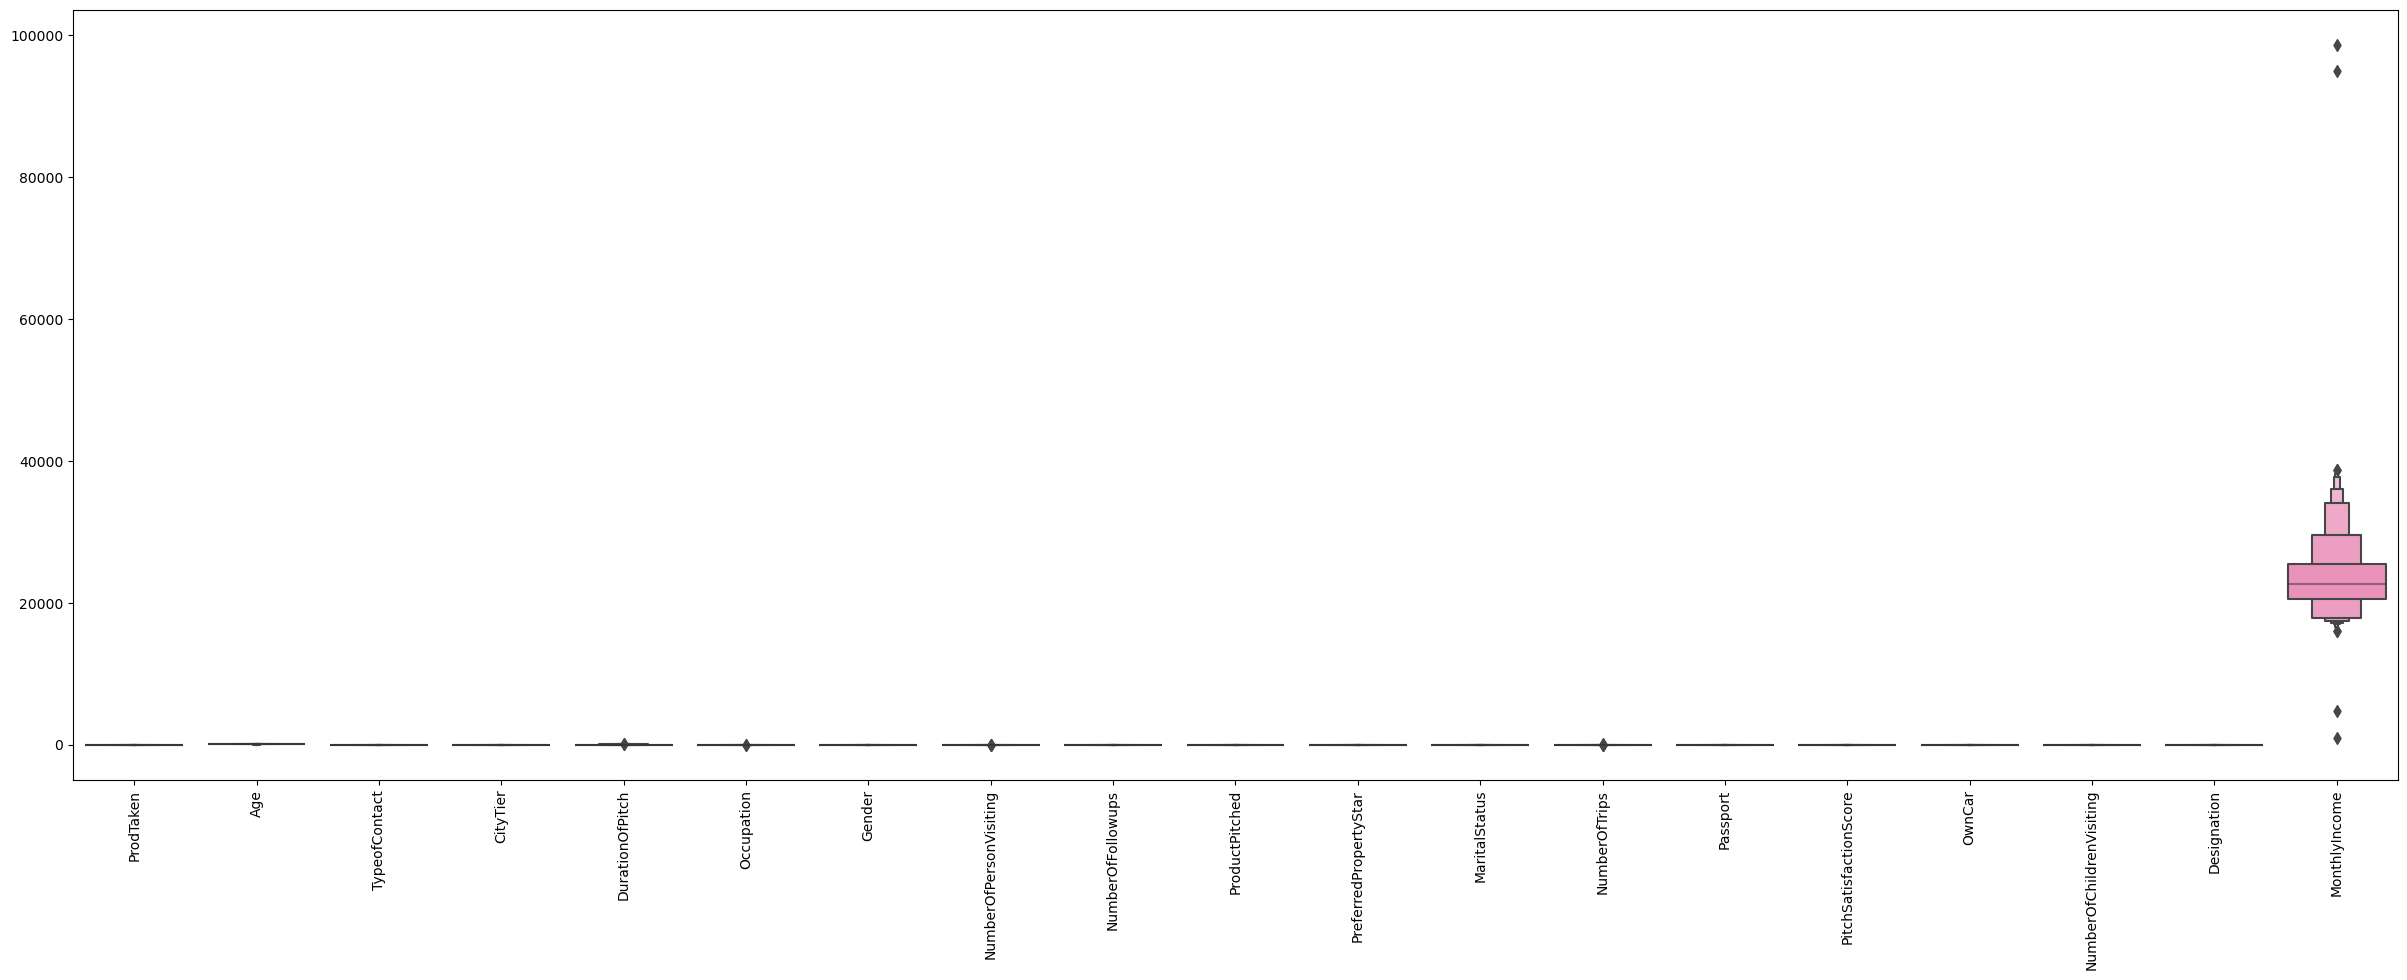

In [28]:
plt.figure(figsize=(30,10))
sns.boxenplot(df);
plt.xticks(rotation = 90);
#plt.savefig("Outlier_boxplot.png")

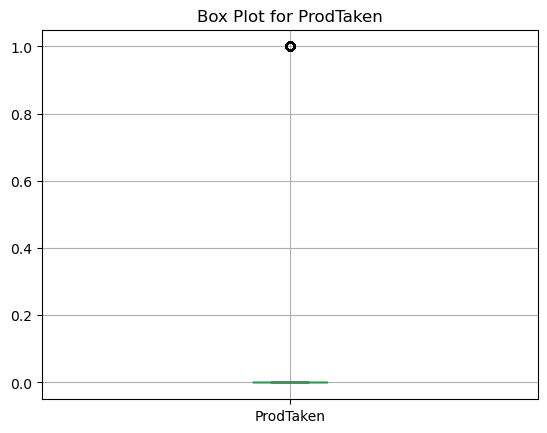

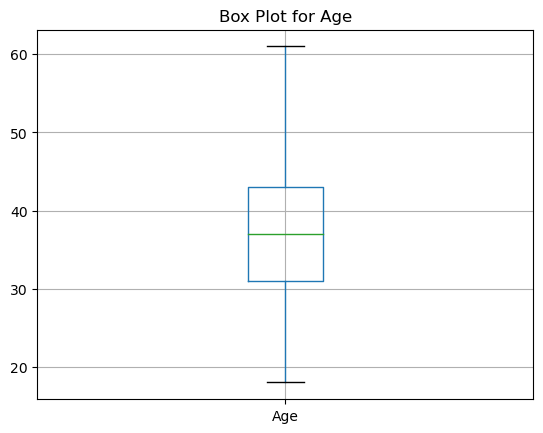

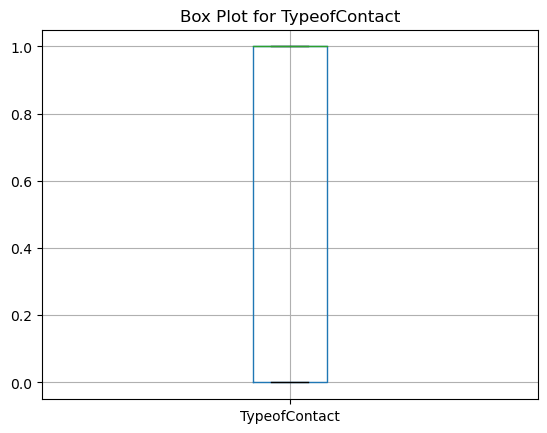

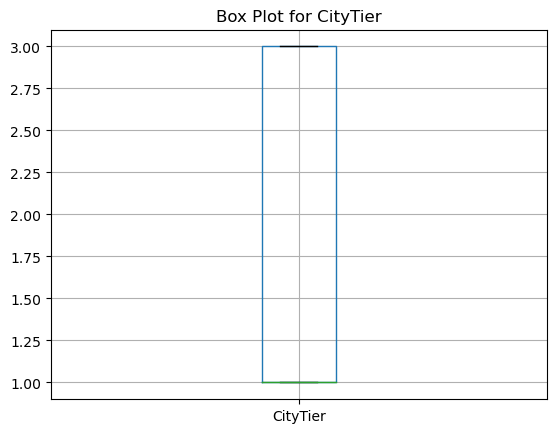

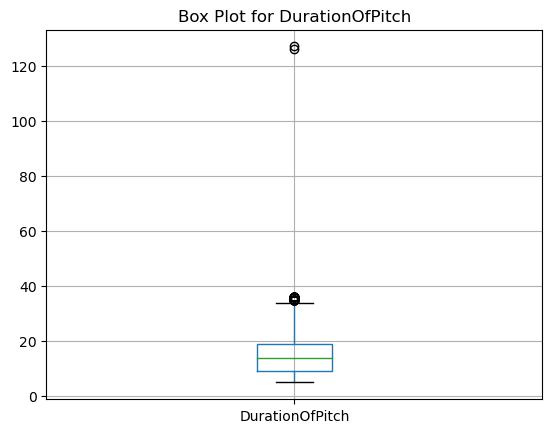

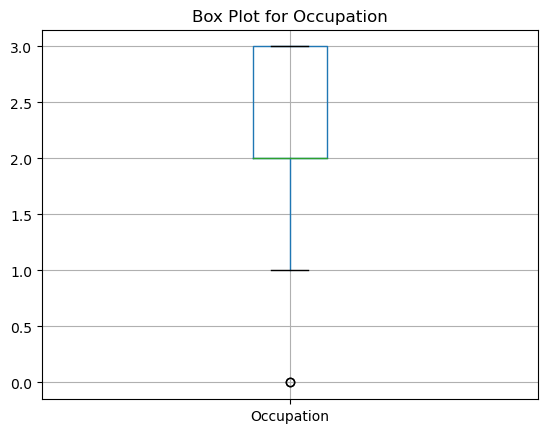

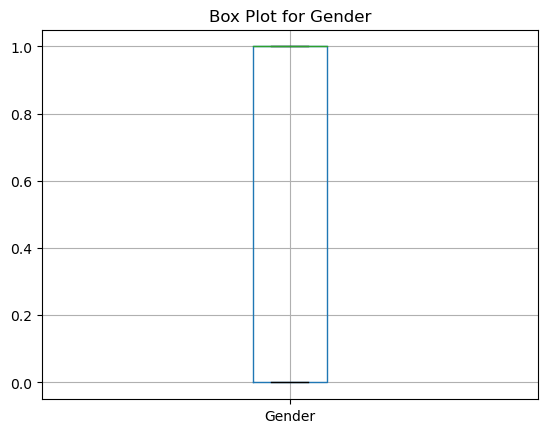

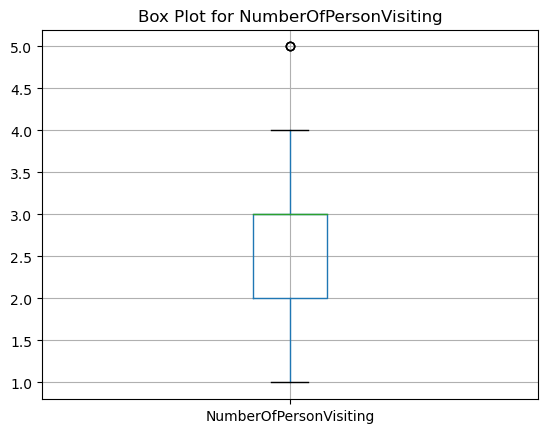

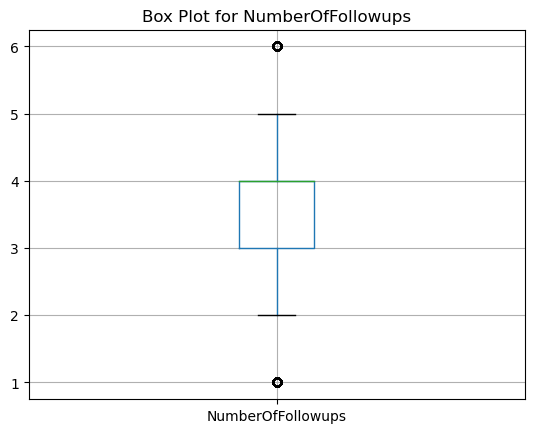

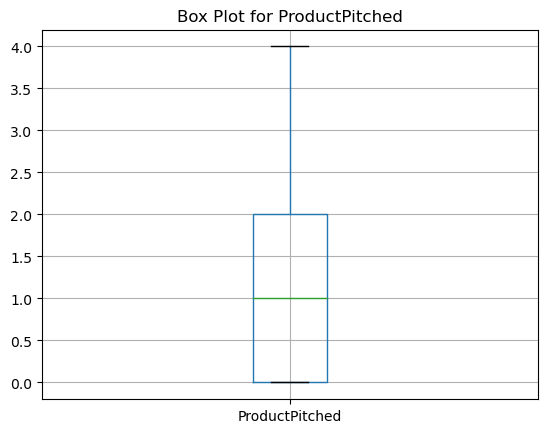

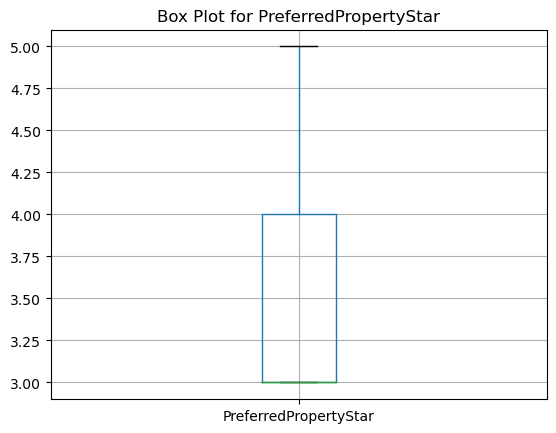

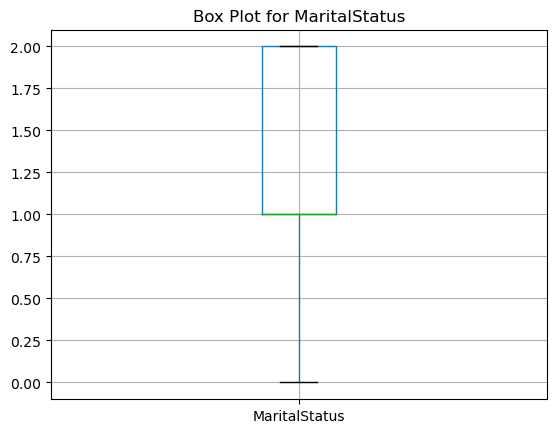

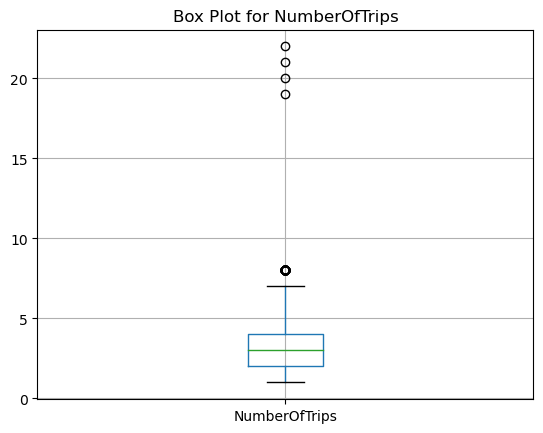

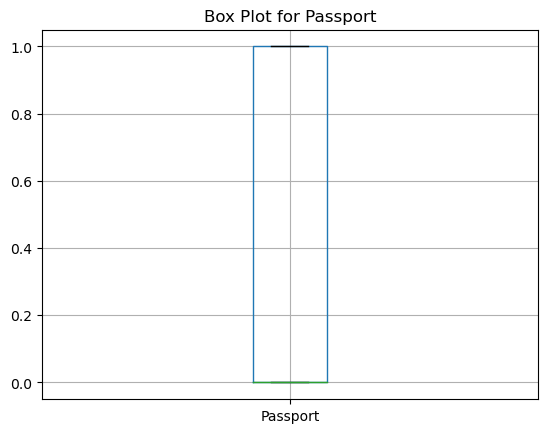

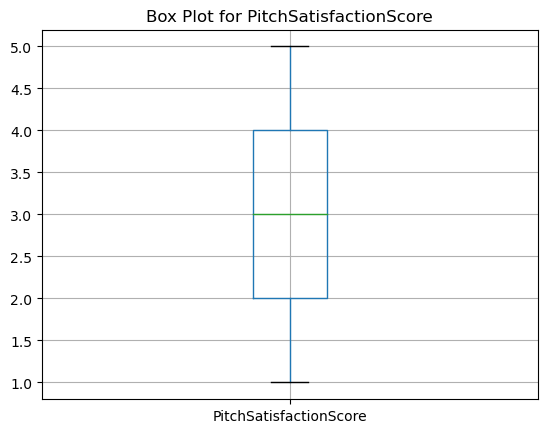

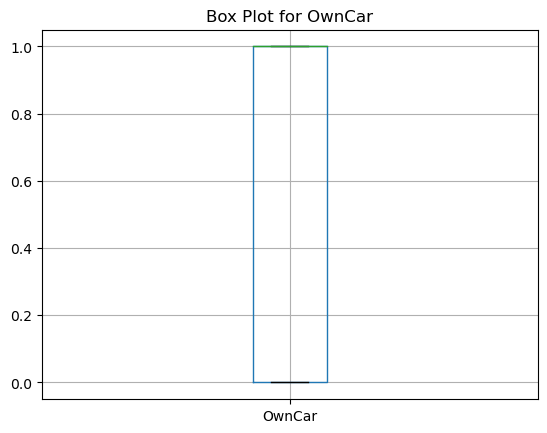

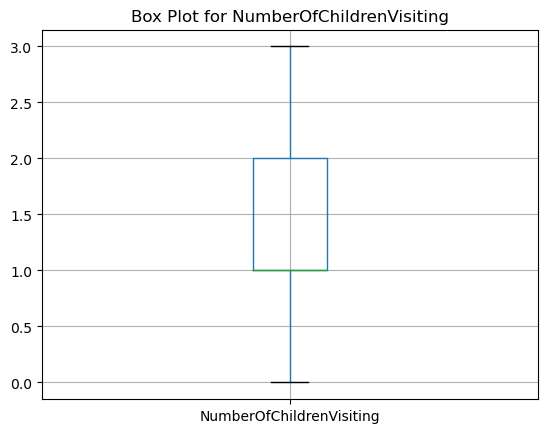

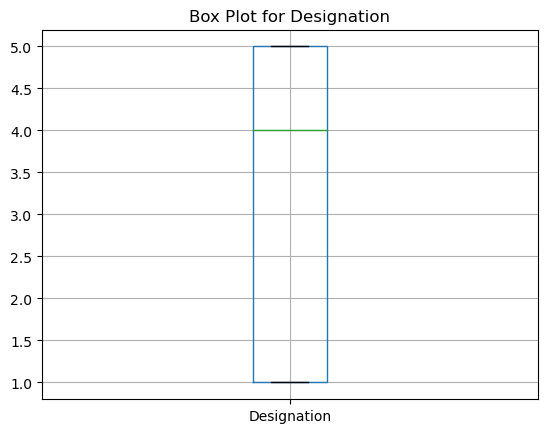

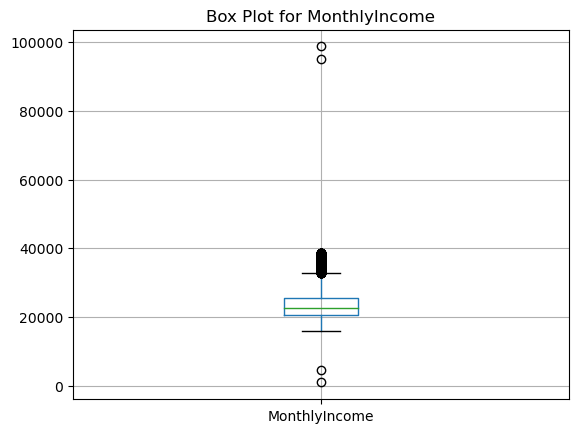

In [29]:
for i in list(df.columns):
    plt.figure()  # Create a new figure for each box plot
    df.boxplot(column=[i])
    plt.title(f'Box Plot for {i}')
    plt.show()
    

### As here we can se the outliers are present in some of the columns 

###### - Outlier Treatment 

In [30]:
def outlier_removal(data,column):
    mean=np.mean(data[column])
    std=np.std(data[column])
    cut_off=std*3
    upper_range,lower_range=mean+cut_off,mean-cut_off
    lower_range_index=list((data[data[column]<lower_range]).index)
    upper_range_index=list((data[data[column]>upper_range]).index)
    outlier_index=lower_range_index+upper_range_index
    data=data.drop(outlier_index,axis=0)
    return data

for i in list(df.columns):
    df = outlier_removal(df,i)

###### - Checking for outliers after removing of outliers

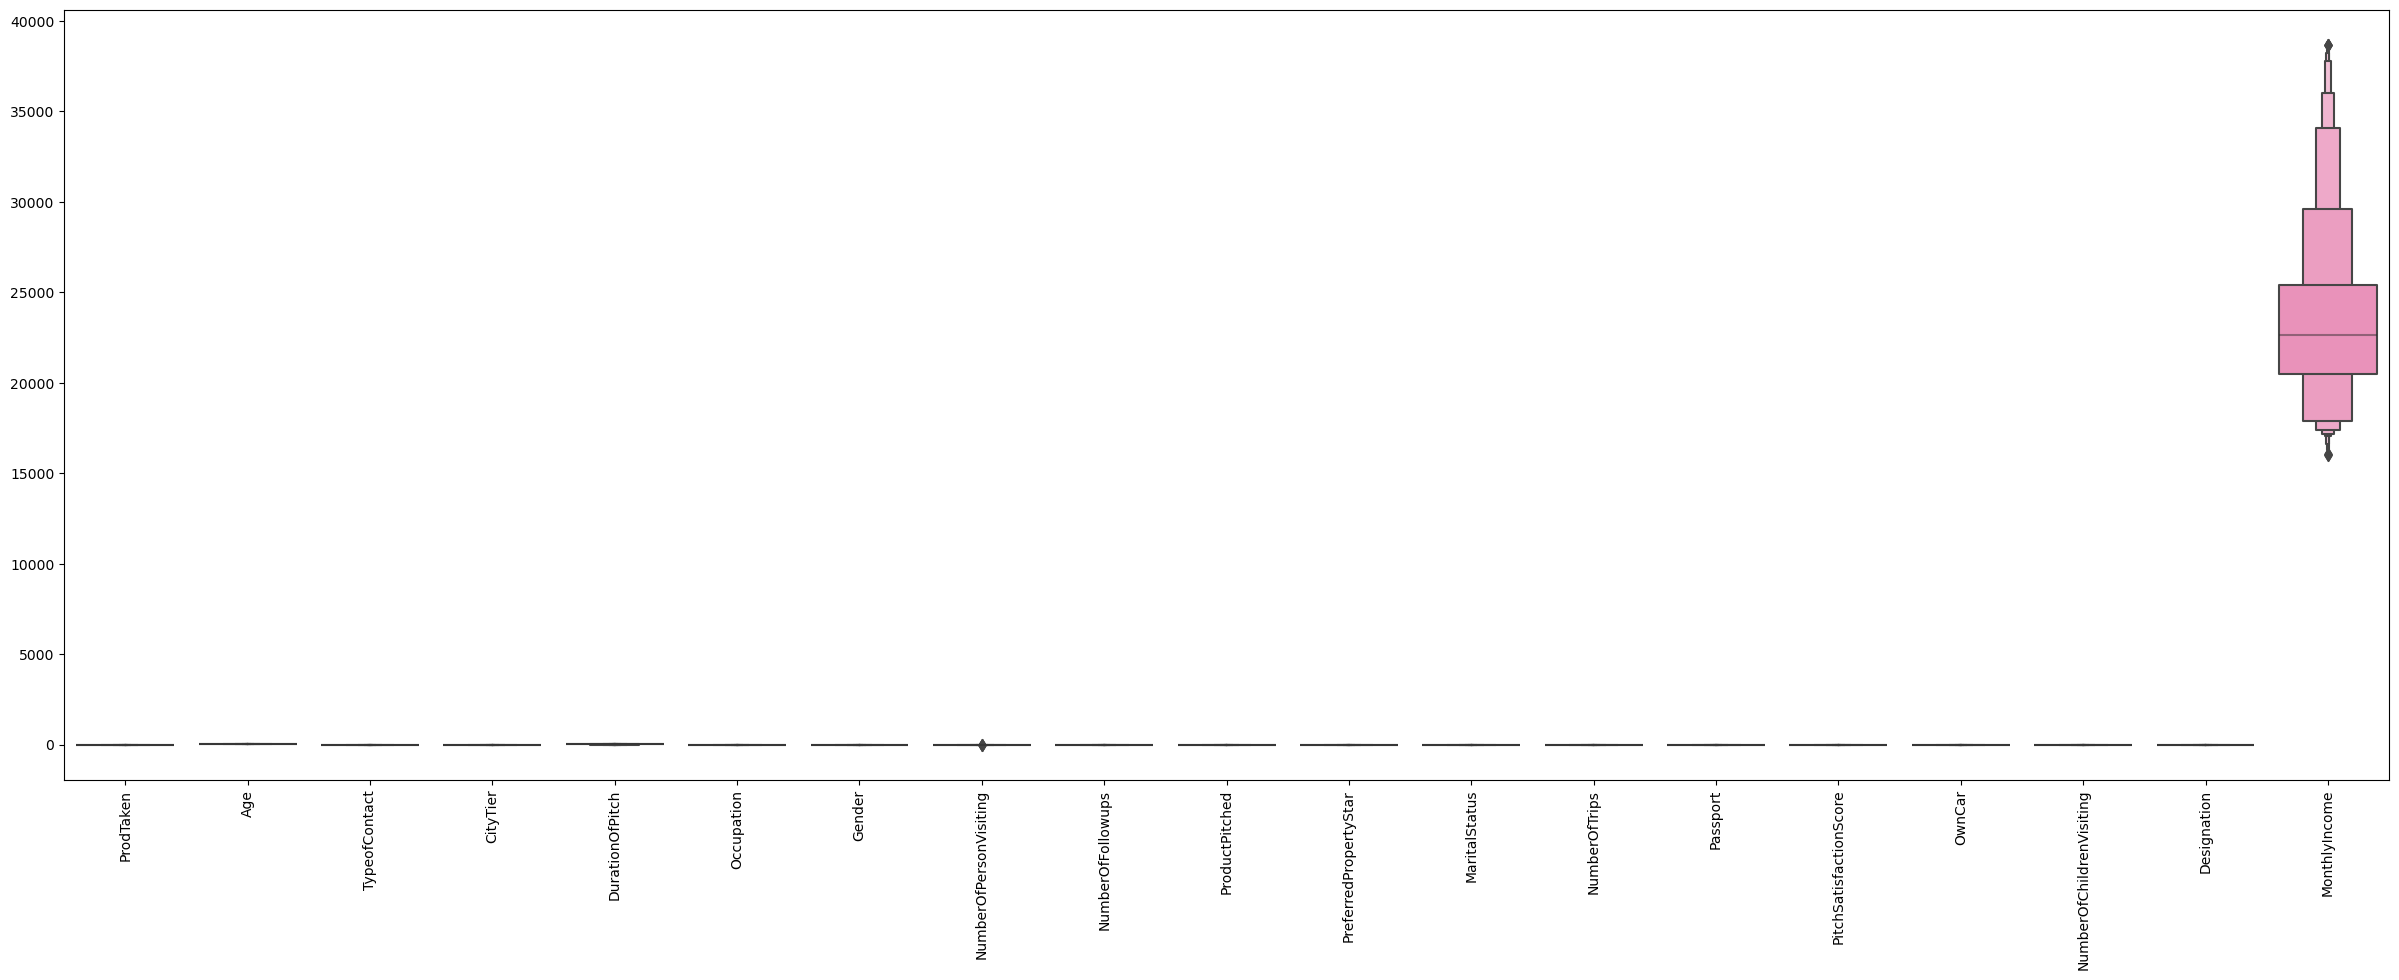

In [31]:
plt.figure(figsize=(30,10))
sns.boxenplot(df);
plt.xticks(rotation = 90);
#plt.savefig("boxplot.png")

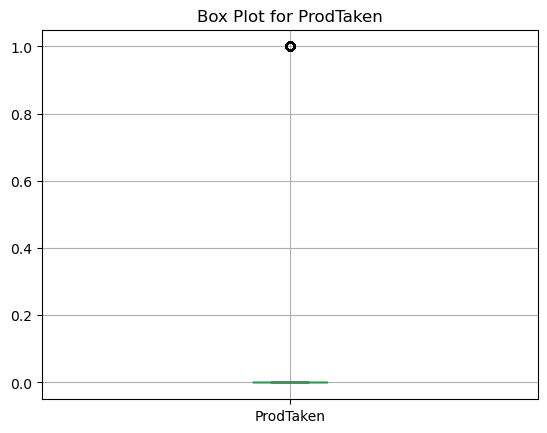

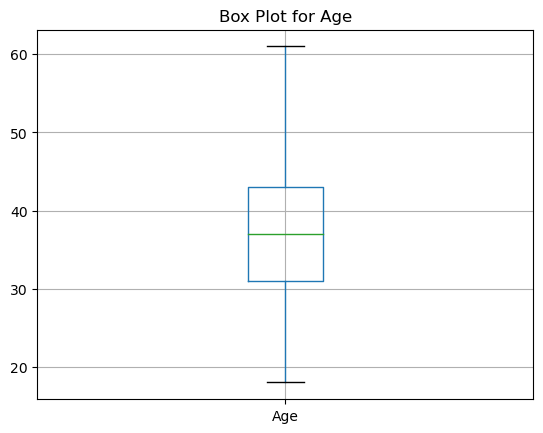

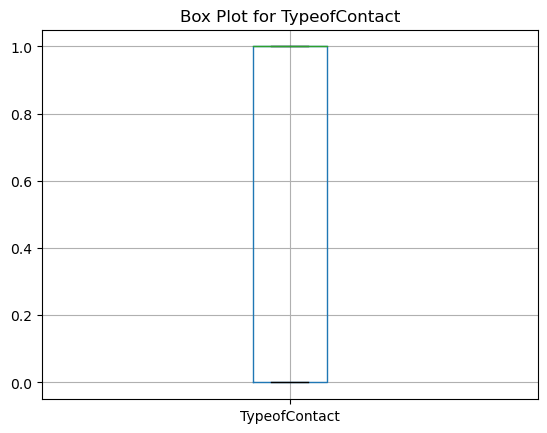

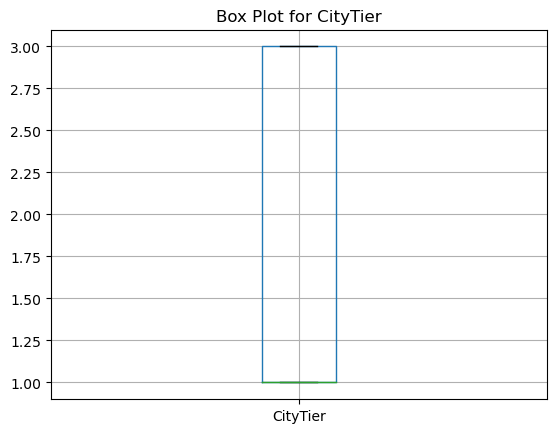

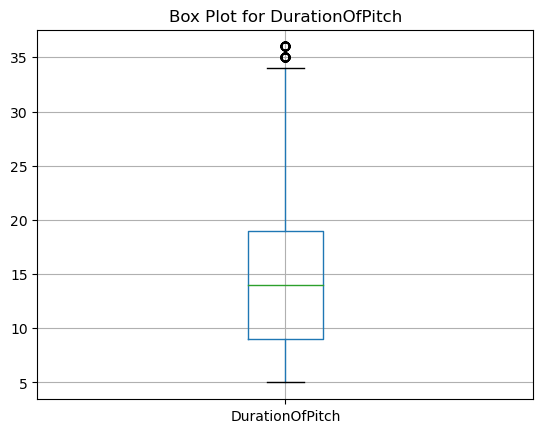

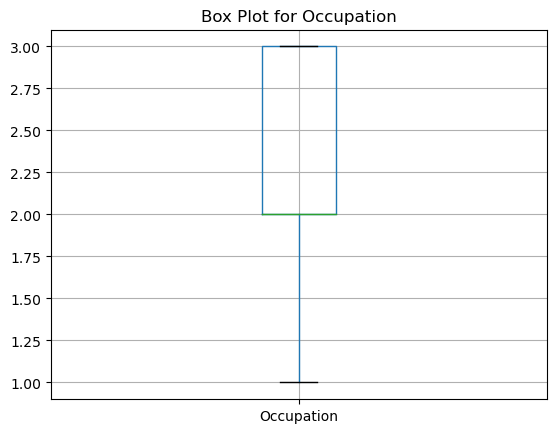

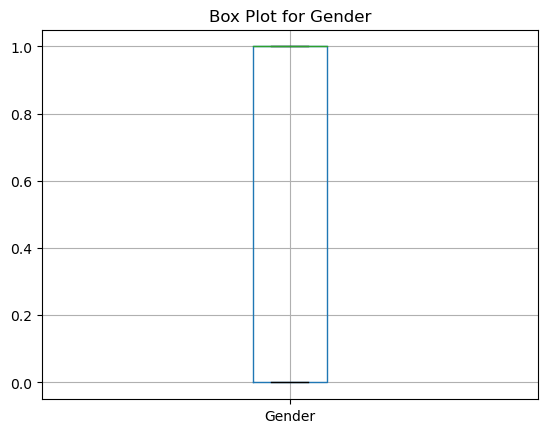

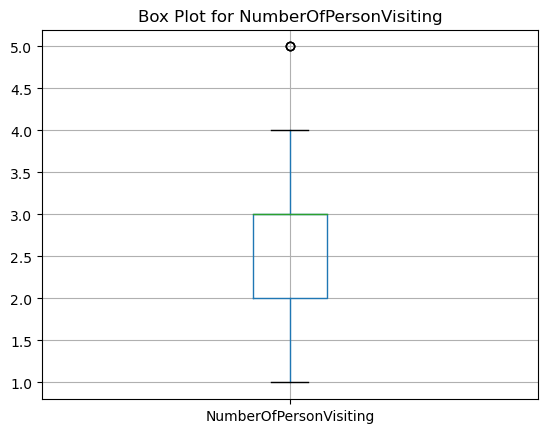

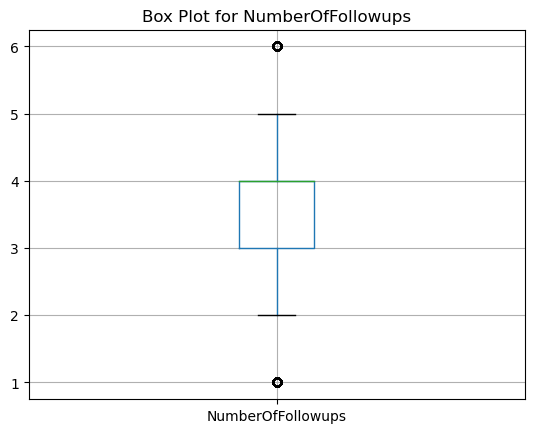

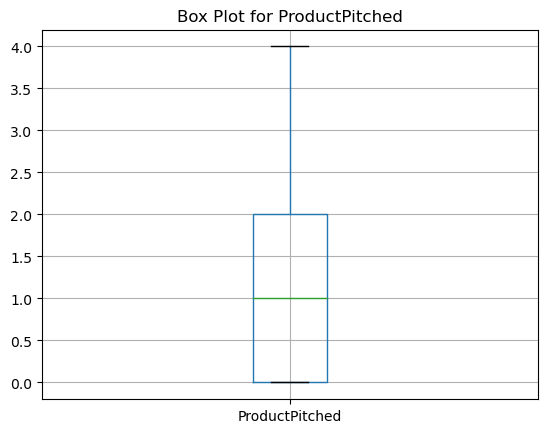

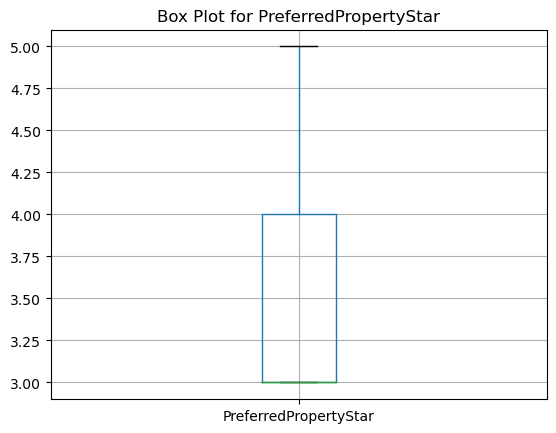

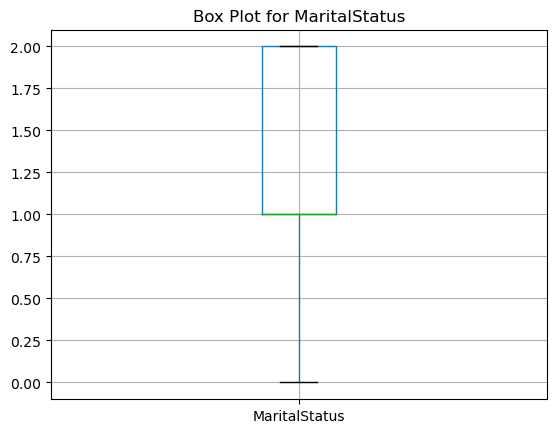

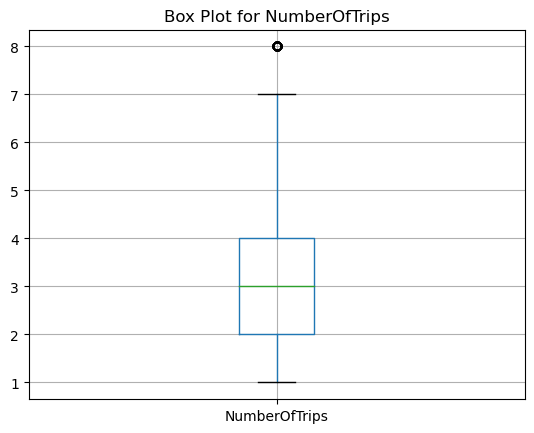

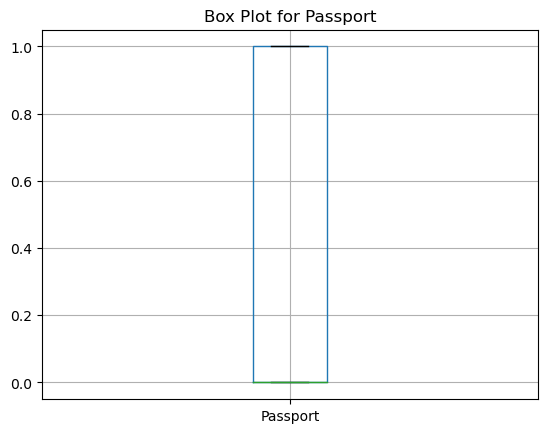

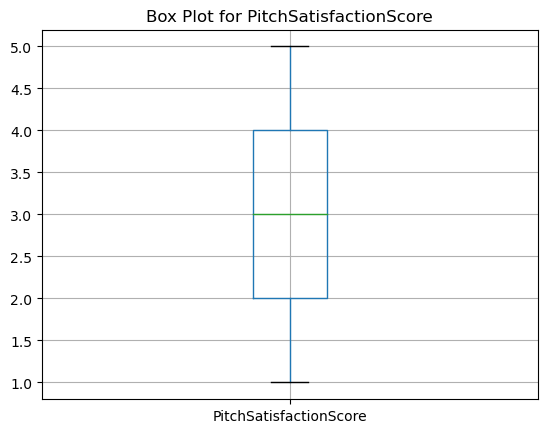

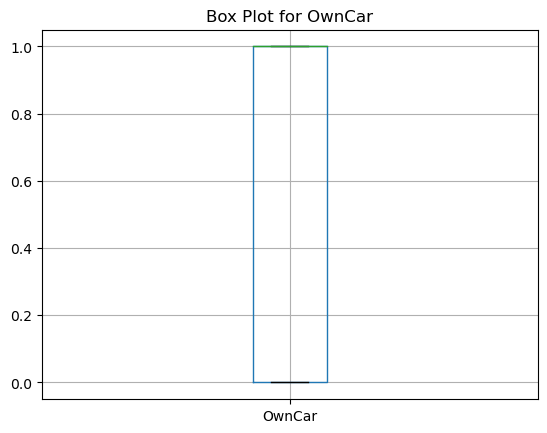

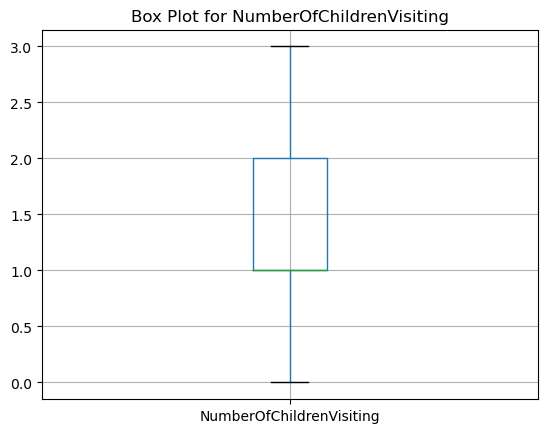

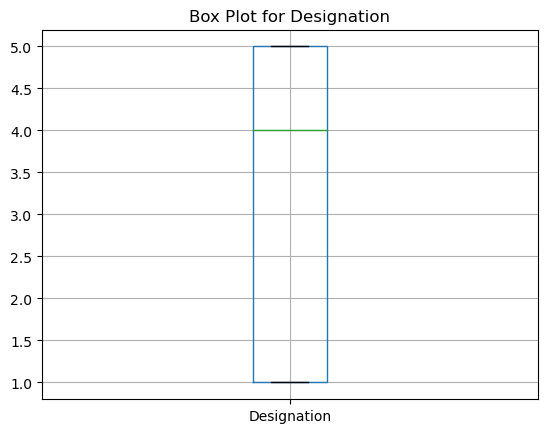

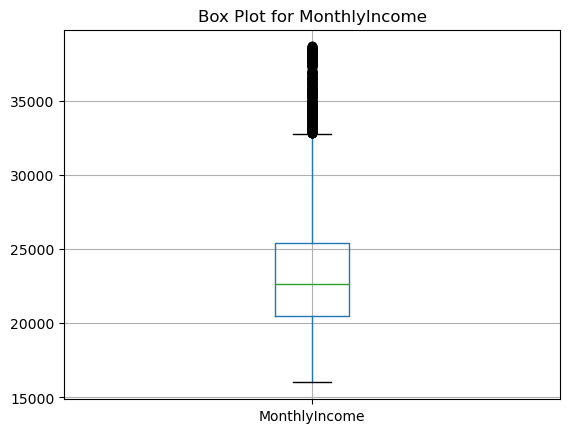

In [32]:
for i in list(df.columns):
    plt.figure()  # Create a new figure for each box plot
    df.boxplot(column=[i])
    plt.title(f'Box Plot for {i}')
    plt.show()
    

### Sampling

In [33]:
print(">>>>>>>> Sampling of Dataset into 80%-20% ratio <<<<<<<<")
print("_____________________________________________________________________________________________________________________________")
train_df ,test_df = train_test_split(df, test_size = .2)
print()
print("Shape of train data = ",train_df.shape)
print("Shape of test data  = ", test_df.shape)

print()
print(">>>>>>>> Seperating X & Y variables from  train and test data <<<<<<<<")
print("_____________________________________________________________________________________________________________________________")
print()
train_df_x = train_df.iloc[:,1::]
train_df_y = train_df.iloc[:,0]

test_df_x = test_df.iloc[:,1::]
test_df_y = test_df.iloc[:,0]

print("Shape of train 'X' data = ",train_df_x.shape)
print("Shape of train 'Y' data  = ", train_df_y.shape)
print()
print("Shape of test 'X' data = ",test_df_x.shape)
print("Shape of test 'Y' data  = ", test_df_y.shape)

>>>>>>>> Sampling of Dataset into 80%-20% ratio <<<<<<<<
_____________________________________________________________________________________________________________________________

Shape of train data =  (3900, 19)
Shape of test data  =  (976, 19)

>>>>>>>> Seperating X & Y variables from  train and test data <<<<<<<<
_____________________________________________________________________________________________________________________________

Shape of train 'X' data =  (3900, 18)
Shape of train 'Y' data  =  (3900,)

Shape of test 'X' data =  (976, 18)
Shape of test 'Y' data  =  (976,)


### Model building

In [34]:
print("                                  Logistic Regression Algorithm                                          ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_df_x,train_df_y)
pred_logreg = logreg.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_logreg = confusion_matrix(train_df_y,pred_logreg)
cm_logreg = pd.DataFrame(tab_logreg, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cm_logreg)
print("---------------------------------------------------")
acc_logreg = tab_logreg.diagonal().sum() * 100 / tab_logreg.sum()
print("Accuracy = ",acc_logreg)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_logreg = recall_score(train_df_y,pred_logreg)*100
print("TPR =", TPR_logreg)
FPR_logreg = tab_logreg[0][1] * 100 / tab_logreg[0].sum()
print("FPR = ",FPR_logreg)
precision_logreg = precision_score(train_df_y,pred_logreg)*100
print("precision = ",precision_logreg)
f_score_logreg = f1_score(train_df_y,pred_logreg)*100
print("F1-Score = ",f_score_logreg)
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_logreg = logreg.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_logreg = confusion_matrix(test_df_y,predt_logreg)
cmt_logreg = pd.DataFrame(tabt_logreg, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_logreg)
print("---------------------------------------------------")
acct_logreg = tabt_logreg.diagonal().sum() * 100 / tabt_logreg.sum()
print("Accuracy = ",acct_logreg)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_logreg = recall_score(test_df_y,predt_logreg)*100
print("TPR =", TPRt_logreg)
FPRt_logreg = tabt_logreg[0][1] * 100 / tabt_logreg[0].sum()
print("FPR = ",FPRt_logreg)
precisiont_logreg = precision_score(test_df_y,predt_logreg)*100
print("precision = ",precisiont_logreg)
f_scoret_logreg = f1_score(test_df_y,predt_logreg)*100
print("F1-Score = ",f_scoret_logreg)

                                  Logistic Regression Algorithm                                          

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
-------------------------------------------------- 
                         Purchased a package  Not purchased a package
Purchased a package                     3140                       22
Not purchased a package                  646                       92
---------------------------------------------------
Accuracy =  82.87179487179488
TPR = 12.466124661246612
FPR =  0.6957621758380772
precision =  80.7017543859649
F1-Score =  21.596244131455396

****************************************************************************************************

In [35]:
print("                                    Decision Tree Algorithm                                              ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
dt = DecisionTreeClassifier()
dt.fit(train_df_x,train_df_y)
pred_dt = dt.predict(train_df_x)
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_dt = confusion_matrix(train_df_y,pred_dt)
cm_dt = pd.DataFrame(tab_dt, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_dt)
print("---------------------------------------------------")
acc_dt = tab_dt.diagonal().sum() * 100 / tab_dt.sum()
print("Accuracy = ",acc_dt)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_dt = recall_score(train_df_y,pred_dt)*100
print("TPR =", TPR_dt)
FPR_dt = tab_dt[0][1] * 100 / tab_dt[0].sum()
print("FPR = ",FPR_dt)
precision_dt = precision_score(train_df_y,pred_dt)*100
print("precision = ",precision_dt)
f_score_dt = f1_score(train_df_y,pred_dt)*100
print("F1-Score = ",f_score_dt)
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_dt = dt.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_dt = confusion_matrix(test_df_y,predt_dt)
cmt_dt = pd.DataFrame(tabt_dt, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_dt)
print("---------------------------------------------------")
acct_dt = tabt_dt.diagonal().sum() * 100 / tabt_dt.sum()
print("Accuracy = ",acct_dt)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_dt = recall_score(test_df_y,predt_dt)*100
print("TPR =", TPRt_dt)
FPRt_dt = tabt_dt[0][1] * 100 / tabt_dt[0].sum()
print("FPR = ",FPRt_dt)
precisiont_dt = precision_score(test_df_y,predt_dt)*100
print("precision = ",precisiont_dt)
f_scoret_dt = f1_score(test_df_y,predt_dt)*100
print("F1-Score = ",f_scoret_dt)

                                    Decision Tree Algorithm                                              

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
-------------------------------------------------- 
                         Purchased a package  Not purchased a package
Purchased a package                     3162                        0
Not purchased a package                    0                      738
---------------------------------------------------
Accuracy =  100.0
TPR = 100.0
FPR =  0.0
precision =  100.0
F1-Score =  100.0

*********************************************************************************************************
                                   Prediction For Test Dat

In [36]:
print("                                    Random Forest Algorithm                                              ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
rf = RandomForestClassifier() 
rf.fit(train_df_x,train_df_y) 
pred_rf = rf.predict(train_df_x) 
print("Confusion Matrix")
print("--------------------------------------------------------")
tab_rf = confusion_matrix(train_df_y,pred_rf)
cm_rf = pd.DataFrame(tab_rf, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_rf)
print("--------------------------------------------------------")
acc_rf = tab_rf.diagonal().sum() * 100 / tab_rf.sum()
print("Accuracy = ",acc_rf)
from sklearn.metrics import recall_score, precision_score, f1_score 
TPR_rf = recall_score(train_df_y,pred_rf)*100
print("TPR =", TPR_rf)
FPR_rf = tab_rf[0][1] * 100 / tab_rf[0].sum()
print("FPR = ",FPR_rf)
precision_rf = precision_score(train_df_y,pred_rf)*100
print("precision = ",precision_rf)
f_score_rf = f1_score(train_df_y,pred_rf)*100
print('F1-Score = ',f_score_rf)
print()
print("*********************************************************************************************************")
print("                                    Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_rf = rf.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_rf = confusion_matrix(test_df_y,predt_rf)
cmt_rf = pd.DataFrame(tabt_rf, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_rf)
print("---------------------------------------------------")
acct_rf = tabt_rf.diagonal().sum() * 100 / tabt_rf.sum()
print("Accuracy = ",acct_rf)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_rf = recall_score(test_df_y,predt_rf)*100
print("TPR =", TPRt_rf)
FPRt_rf = tabt_rf[0][1] * 100 / tabt_rf[0].sum()
print("FPR = ",FPRt_rf)
precisiont_rf = precision_score(test_df_y,predt_rf)*100
print("precision = ",precisiont_rf)
f_scoret_rf = f1_score(test_df_y,predt_rf)*100
print("F1-Score = ",f_scoret_rf)

                                    Random Forest Algorithm                                              

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
--------------------------------------------------------
                         Purchased a package  Not purchased a package
Purchased a package                     3162                        0
Not purchased a package                    0                      738
--------------------------------------------------------
Accuracy =  100.0
TPR = 100.0
FPR =  0.0
precision =  100.0
F1-Score =  100.0

*********************************************************************************************************
                                    Prediction F

In [37]:
print("                                      K-Nearest Neighbour                                                ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
kn = KNeighborsClassifier()
kn.fit(train_df_x,train_df_y)
pred_kn = kn.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("--------------------------------------------------------")
tab_kn = confusion_matrix(train_df_y,pred_kn)
cm_kn = pd.DataFrame(tab_kn, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_kn)
print("--------------------------------------------------------")
acc_kn = tab_kn.diagonal().sum() * 100 / tab_kn.sum()
print("Accuracy = ",acc_kn)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_kn = recall_score(train_df_y,pred_kn)*100
print("TPR =", TPR_kn)
FPR_kn = tab_kn[0][1] * 100 / tab_kn[0].sum()
print("FPR = ",FPR_rf)
precision_kn = precision_score(train_df_y,pred_kn)*100
print("precision = ",precision_kn)
f_score_kn = f1_score(train_df_y,pred_kn)*100
print('F1-Score = ',f_score_kn)
print()
print("*********************************************************************************************************")
print("                                    Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_kn = kn.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_kn = confusion_matrix(test_df_y,predt_kn)
cmt_kn = pd.DataFrame(tabt_kn, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_kn)
print("---------------------------------------------------")
acct_kn = tabt_kn.diagonal().sum() * 100 / tabt_kn.sum()
print("Accuracy = ",acct_kn)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_kn = recall_score(test_df_y,predt_kn)*100
print("TPR =", TPRt_kn)
FPRt_kn = tabt_kn[0][1] * 100 / tabt_kn[0].sum()
print("FPR = ",FPRt_kn)
precisiont_kn = precision_score(test_df_y,predt_kn)*100
print("precision = ",precisiont_kn)
f_scoret_kn = f1_score(test_df_y,predt_kn)*100
print("F1-Score = ",f_scoret_kn)

                                      K-Nearest Neighbour                                                

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
--------------------------------------------------------
                         Purchased a package  Not purchased a package
Purchased a package                     3050                      112
Not purchased a package                  505                      233
--------------------------------------------------------
Accuracy =  84.17948717948718
TPR = 31.571815718157183
FPR =  0.0
precision =  67.53623188405797
F1-Score =  43.0286241920591

*********************************************************************************************************


### Performance Tabulation

In [38]:
dict_parma ={ "Performance_Parameters": ["Accuracy","Recall Score(TPR)",
                                         "FPR","Precision Score","F1-Score"],
      "Random Forest_Train": [acc_rf,TPR_rf,FPR_rf,precision_rf,f_score_rf],
      "Random Forest_Test":[acct_rf,TPRt_rf,FPRt_rf,precisiont_rf,f_scoret_rf],
             
      "Decision Tree_Train":[acc_dt,TPR_dt,FPR_dt,precision_dt,f_score_dt],
      "Decision Tree_Test":[acct_dt,TPRt_dt,FPRt_dt,precisiont_dt,f_scoret_dt],
             
      "Logistics Regression_Train":[acc_logreg,TPR_logreg,FPR_logreg ,precision_logreg,f_score_logreg],
      "Logistic Regression_Test":[acct_logreg,TPRt_logreg,FPRt_logreg ,precisiont_logreg,f_scoret_logreg],     
             
      "K-Nearest Neighbour_Train":[acc_kn,TPR_kn,FPR_kn,precision_kn,f_score_kn],
      "K-Nearest Neighbour_Test":[acct_kn,TPRt_kn,FPRt_kn,precisiont_kn,f_scoret_kn]
    }

Performance_Metrics1= pd.DataFrame(dict_parma)
Performance_Metrics1


,Performance_Parameters,Random Forest_Train,Random Forest_Test,Decision Tree_Train,Decision Tree_Test,Logistics Regression_Train,Logistic Regression_Test,K-Nearest Neighbour_Train,K-Nearest Neighbour_Test
0,Accuracy,100.0,92.213115,100.0,92.520492,82.871795,83.094262,84.179487,79.610656
1,Recall Score(TPR),100.0,61.235955,100.0,81.460674,12.466125,11.235955,31.571816,15.730337
2,FPR,0.0,0.877193,0.0,5.012531,0.695762,0.877193,3.542062,6.140351
3,Precision Score,100.0,93.965517,100.0,78.378378,80.701754,74.074074,67.536232,36.363636
4,F1-Score,100.0,74.149660,100.0,79.889807,21.596244,19.512195,43.028624,21.960784


### Handeling of class imbalance

### - As there is a problem of class imbalance in the Target variable

In [39]:
print(train_df_y.value_counts(),"\n",train_df_y.value_counts(normalize=True)*100)

0    3162
1     738
Name: ProdTaken, dtype: int64 
 0    81.076923
1    18.923077
Name: ProdTaken, dtype: float64


### Here For Target variable the data is imbalance

- The 81.28 % of data  from total data is for class 0 and 18.71 % of data is for class 1

So Here is the problem of class imbalance which we need to solve it by using SMOTE which is used to over come the problem of  class imbalance

### - Handling imbalanced data using SMOTE

In [40]:
smote = SMOTE(sampling_strategy= 0.9)
train_x_resampled, train_y_resampled = smote.fit_resample(train_df_x, train_df_y)
train_x_resampled.shape, train_y_resampled.shape

((6007, 18), (6007,))

In [41]:
print(train_y_resampled.value_counts(),"\n",train_y_resampled.value_counts(normalize=True)*100)

0    3162
1    2845
Name: ProdTaken, dtype: int64 
 0    52.638588
1    47.361412
Name: ProdTaken, dtype: float64


##### Now The ratio class 0 & class 1 is 52.5% and 47.44% respectively

In [42]:
train_df_x = train_x_resampled 
train_df_y = train_y_resampled

### Standardizing Of Data

In [43]:
scalar = StandardScaler()

train_df_x_scaled = scalar.fit_transform(train_df_x)
test_df_x_scaled = scalar.transform(test_df_x)

In [44]:
train_df_x = train_df_x_scaled 
test_df_x = test_df_x_scaled

### Model Building Before Hyper Parameter tunning

In [45]:
print("                                  Logistic Regression Algorithm                                          ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_df_x,train_df_y)
pred_logreg = logreg.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_logreg = confusion_matrix(train_df_y,pred_logreg)
cm_logreg = pd.DataFrame(tab_logreg, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cm_logreg)
print("---------------------------------------------------")
acc_logreg = tab_logreg.diagonal().sum() * 100 / tab_logreg.sum()
print("Accuracy = ",acc_logreg)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_logreg = recall_score(train_df_y,pred_logreg)*100
print("TPR =", TPR_logreg)
FPR_logreg = tab_logreg[0][1] * 100 / tab_logreg[0].sum()
print("FPR = ",FPR_logreg)
precision_logreg = precision_score(train_df_y,pred_logreg)*100
print("precision = ",precision_logreg)
f_score_logreg = f1_score(train_df_y,pred_logreg)*100
print("F1-Score = ",f_score_logreg)
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_logreg = logreg.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_logreg = confusion_matrix(test_df_y,predt_logreg)
cmt_logreg = pd.DataFrame(tabt_logreg, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_logreg)
print("---------------------------------------------------")
acct_logreg = tabt_logreg.diagonal().sum() * 100 / tabt_logreg.sum()
print("Accuracy = ",acct_logreg)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_logreg = recall_score(test_df_y,predt_logreg)*100
print("TPR =", TPRt_logreg)
FPRt_logreg = tabt_logreg[0][1] * 100 / tabt_logreg[0].sum()
print("FPR = ",FPRt_logreg)
precisiont_logreg = precision_score(test_df_y,predt_logreg)*100
print("precision = ",precisiont_logreg)
f_scoret_logreg = f1_score(test_df_y,predt_logreg)*100
print("F1-Score = ",f_scoret_logreg)

                                  Logistic Regression Algorithm                                          

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
-------------------------------------------------- 
                         Purchased a package  Not purchased a package
Purchased a package                     2452                      710
Not purchased a package                  849                     1996
---------------------------------------------------
Accuracy =  74.04694523056435
TPR = 70.15817223198594
FPR =  22.45414294750158
precision =  73.7620103473762
F1-Score =  71.91497027562602

*******************************************************************************************************

In [46]:
print("                                    Decision Tree Algorithm                                              ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
dt = DecisionTreeClassifier()
dt.fit(train_df_x,train_df_y)
pred_dt = dt.predict(train_df_x)
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_dt = confusion_matrix(train_df_y,pred_dt)
cm_dt = pd.DataFrame(tab_dt, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_dt)
print("---------------------------------------------------")
acc_dt = tab_dt.diagonal().sum() * 100 / tab_dt.sum()
print("Accuracy = ",acc_dt)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_dt = recall_score(train_df_y,pred_dt)*100
print("TPR =", TPR_dt)
FPR_dt = tab_dt[0][1] * 100 / tab_dt[0].sum()
print("FPR = ",FPR_dt)
precision_dt = precision_score(train_df_y,pred_dt)*100
print("precision = ",precision_dt)
f_score_dt = f1_score(train_df_y,pred_dt)*100
print("F1-Score = ",f_score_dt)
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_dt = dt.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_dt = confusion_matrix(test_df_y,predt_dt)
cmt_dt = pd.DataFrame(tabt_dt, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_dt)
print("---------------------------------------------------")
acct_dt = tabt_dt.diagonal().sum() * 100 / tabt_dt.sum()
print("Accuracy = ",acct_dt)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_dt = recall_score(test_df_y,predt_dt)*100
print("TPR =", TPRt_dt)
FPRt_dt = tabt_dt[0][1] * 100 / tabt_dt[0].sum()
print("FPR = ",FPRt_dt)
precisiont_dt = precision_score(test_df_y,predt_dt)*100
print("precision = ",precisiont_dt)
f_scoret_dt = f1_score(test_df_y,predt_dt)*100
print("F1-Score = ",f_scoret_dt)

                                    Decision Tree Algorithm                                              

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
-------------------------------------------------- 
                         Purchased a package  Not purchased a package
Purchased a package                     3162                        0
Not purchased a package                    0                     2845
---------------------------------------------------
Accuracy =  100.0
TPR = 100.0
FPR =  0.0
precision =  100.0
F1-Score =  100.0

*********************************************************************************************************
                                   Prediction For Test Dat

In [47]:
print("                                    Random Forest Algorithm                                              ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
rf = RandomForestClassifier() 
rf.fit(train_df_x,train_df_y) 
pred_rf = rf.predict(train_df_x) 
print("Confusion Matrix")
print("--------------------------------------------------------")
tab_rf = confusion_matrix(train_df_y,pred_rf)
cm_rf = pd.DataFrame(tab_rf, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_rf)
print("--------------------------------------------------------")
acc_rf = tab_rf.diagonal().sum() * 100 / tab_rf.sum()
print("Accuracy = ",acc_rf)
from sklearn.metrics import recall_score, precision_score, f1_score 
TPR_rf = recall_score(train_df_y,pred_rf)*100
print("TPR =", TPR_rf)
FPR_rf = tab_rf[0][1] * 100 / tab_rf[0].sum()
print("FPR = ",FPR_rf)
precision_rf = precision_score(train_df_y,pred_rf)*100
print("precision = ",precision_rf)
f_score_rf = f1_score(train_df_y,pred_rf)*100
print('F1-Score = ',f_score_rf)
print()
print("*********************************************************************************************************")
print("                                    Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_rf = rf.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_rf = confusion_matrix(test_df_y,predt_rf)
cmt_rf = pd.DataFrame(tabt_rf, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_rf)
print("---------------------------------------------------")
acct_rf = tabt_rf.diagonal().sum() * 100 / tabt_rf.sum()
print("Accuracy = ",acct_rf)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_rf = recall_score(test_df_y,predt_rf)*100
print("TPR =", TPRt_rf)
FPRt_rf = tabt_rf[0][1] * 100 / tabt_rf[0].sum()
print("FPR = ",FPRt_rf)
precisiont_rf = precision_score(test_df_y,predt_rf)*100
print("precision = ",precisiont_rf)
f_scoret_rf = f1_score(test_df_y,predt_rf)*100
print("F1-Score = ",f_scoret_rf)

                                    Random Forest Algorithm                                              

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
--------------------------------------------------------
                         Purchased a package  Not purchased a package
Purchased a package                     3162                        0
Not purchased a package                    0                     2845
--------------------------------------------------------
Accuracy =  100.0
TPR = 100.0
FPR =  0.0
precision =  100.0
F1-Score =  100.0

*********************************************************************************************************
                                    Prediction F

In [48]:
print("                                      K-Nearest Neighbour                                                ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
kn = KNeighborsClassifier()
kn.fit(train_df_x,train_df_y)
pred_kn = kn.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("--------------------------------------------------------")
tab_kn = confusion_matrix(train_df_y,pred_kn)
cm_kn = pd.DataFrame(tab_kn, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_kn)
print("--------------------------------------------------------")
acc_kn = tab_kn.diagonal().sum() * 100 / tab_kn.sum()
print("Accuracy = ",acc_kn)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_kn = recall_score(train_df_y,pred_kn)*100
print("TPR =", TPR_kn)
FPR_kn = tab_kn[0][1] * 100 / tab_kn[0].sum()
print("FPR = ",FPR_rf)
precision_kn = precision_score(train_df_y,pred_kn)*100
print("precision = ",precision_kn)
f_score_kn = f1_score(train_df_y,pred_kn)*100
print('F1-Score = ',f_score_kn)
print()
print("*********************************************************************************************************")
print("                                    Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_kn = kn.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_kn = confusion_matrix(test_df_y,predt_kn)
cmt_kn = pd.DataFrame(tabt_kn, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_kn)
print("---------------------------------------------------")
acct_kn = tabt_kn.diagonal().sum() * 100 / tabt_kn.sum()
print("Accuracy = ",acct_kn)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_kn = recall_score(test_df_y,predt_kn)*100
print("TPR =", TPRt_kn)
FPRt_kn = tabt_kn[0][1] * 100 / tabt_kn[0].sum()
print("FPR = ",FPRt_kn)
precisiont_kn = precision_score(test_df_y,predt_kn)*100
print("precision = ",precisiont_kn)
f_scoret_kn = f1_score(test_df_y,predt_kn)*100
print("F1-Score = ",f_scoret_kn)

                                      K-Nearest Neighbour                                                

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************

Confusion Matrix
--------------------------------------------------------
                         Purchased a package  Not purchased a package
Purchased a package                     2906                      256
Not purchased a package                   88                     2757
--------------------------------------------------------
Accuracy =  94.27334776094557
TPR = 96.90685413005272
FPR =  0.0
precision =  91.50348489877199
F1-Score =  94.12768863093206

*********************************************************************************************************


In [49]:
dict_parma ={ "Performance_Parameters": ["Accuracy","Recall Score(TPR)",
                                         "FPR","Precision Score","F1-Score"],
      "Random Forest_Train": [acc_rf,TPR_rf,FPR_rf,precision_rf,f_score_rf],
      "Random Forest_Test":[acct_rf,TPRt_rf,FPRt_rf,precisiont_rf,f_scoret_rf],
             
      "Decision Tree_Train":[acc_dt,TPR_dt,FPR_dt,precision_dt,f_score_dt],
      "Decision Tree_Test":[acct_dt,TPRt_dt,FPRt_dt,precisiont_dt,f_scoret_dt],
             
      "Logistics Regression_Train":[acc_logreg,TPR_logreg,FPR_logreg ,precision_logreg,f_score_logreg],
      "Logistic Regression_Test":[acct_logreg,TPRt_logreg,FPRt_logreg ,precisiont_logreg,f_scoret_logreg],     
             
      "K-Nearest Neighbour_Train":[acc_kn,TPR_kn,FPR_kn,precision_kn,f_score_kn],
      "K-Nearest Neighbour_Test":[acct_kn,TPRt_kn,FPRt_kn,precisiont_kn,f_scoret_kn]
    }

Performance_Metrics2= pd.DataFrame(dict_parma)
Performance_Metrics2

,Performance_Parameters,Random Forest_Train,Random Forest_Test,Decision Tree_Train,Decision Tree_Test,Logistics Regression_Train,Logistic Regression_Test,K-Nearest Neighbour_Train,K-Nearest Neighbour_Test
0,Accuracy,100.0,91.290984,100.0,89.856557,74.046945,73.872951,94.273348,84.733607
1,Recall Score(TPR),100.0,61.235955,100.0,73.595506,70.158172,56.179775,96.906854,82.022472
2,FPR,0.0,2.005013,0.0,6.516291,22.454143,22.180451,8.096142,14.661654
3,Precision Score,100.0,87.200000,100.0,71.584699,73.762010,36.101083,91.503485,55.513308
4,F1-Score,100.0,71.947195,100.0,72.576177,71.914970,43.956044,94.127689,66.213152


# 

# 

### Model Building After Hyper Parameter Tunning

In [50]:
print("                Logistic Regression Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Parameter_grid = {'penalty':['l1', 'l2', 'elasticnet'], 
                  'C':[0.3, 0.6, 0.7] ,  
                  'solver':['lbfgs', 'liblinear', 'saga']}

from sklearn.model_selection import GridSearchCV # importing GridSearchCV from sklearn.modelselection
lr_grid = GridSearchCV(estimator = logreg, param_grid = Parameter_grid,cv = 5)
lr_grid.fit(train_df_x,train_df_y)
print()
print()
print("Best parameter are = ", lr_grid.best_params_)
print()
print("********************************************************************************************************")
print()
pred_lr_grid = lr_grid.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_lr_grid = confusion_matrix(train_df_y,pred_lr_grid)
cm_lr_grid = pd.DataFrame(tab_lr_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cm_lr_grid)
print("---------------------------------------------------")
acc_lr_grid = tab_lr_grid.diagonal().sum() * 100 / tab_lr_grid.sum()
print("Accuracy = ",acc_lr_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_lr_grid = recall_score(train_df_y,pred_lr_grid)*100
print("TPR =", TPR_lr_grid)
FPR_lr_grid = tab_lr_grid[0][1] * 100 / tab_lr_grid[0].sum()
print("FPR = ",FPR_lr_grid)
precision_lr_grid = precision_score(train_df_y,pred_lr_grid)*100
print("precision = ",precision_lr_grid)
f_score_lr_grid = f1_score(train_df_y,pred_lr_grid)*100
print("F1-Score = ",f_score_lr_grid)
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                             ")
print("*********************************************************************************************************")
print()
predt_lr_grid = lr_grid.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_lr_grid = confusion_matrix(test_df_y,predt_lr_grid)
cmt_lr_grid = pd.DataFrame(tabt_lr_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"])
print(cmt_lr_grid)
print("---------------------------------------------------")
acct_lr_grid = tabt_lr_grid.diagonal().sum() * 100 / tabt_lr_grid.sum()
print("Accuracy = ",acct_lr_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_lr_grid = recall_score(test_df_y,predt_lr_grid)*100
print("TPR =", TPRt_lr_grid)
FPRt_lr_grid = tabt_lr_grid[0][1] * 100 / tabt_lr_grid[0].sum()
print("FPR = ",FPRt_lr_grid)
precisiont_lr_grid = precision_score(test_df_y,predt_lr_grid)*100
print("precision = ",precisiont_lr_grid)
f_scoret_lr_grid = f1_score(test_df_y,predt_lr_grid)*100
print("F1-Score = ",f_scoret_lr_grid)

                Logistic Regression Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************



Best parameter are =  {'C': 0.3, 'penalty': 'l2', 'solver': 'lbfgs'}

********************************************************************************************************

Confusion Matrix
-------------------------------------------------- 
                         Purchased a package  Not purchased a package
Purchased a package                     2453                      709
Not purchased a package                  850                     1995
---------------------------------------------------
Accuracy =  74.04694523056435
TPR = 70.12302284710017
FPR =

In [51]:
print("                Decision Tree Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

Parameter_grid = {"max_features":[2,6,8], "max_depth":[3,8,10],
                  "criterion":['gini', 'entropy'], 
                  "min_samples_leaf" : [50,75,100], 
                  'min_samples_split' :[125,150,175],
                  'splitter':['best','random']}

from sklearn.model_selection import GridSearchCV # importing GridSearchCV from sklearn.modelselection

dt_grid = GridSearchCV(estimator = dt, param_grid = Parameter_grid,cv = 5)
dt_grid.fit(train_df_x,train_df_y)
print()
print("Best parameter are = ", dt_grid.best_params_)
print()
print("*********************************************************************************************************")
print()
pred_dt_grid = dt_grid.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_dt_grid = confusion_matrix(train_df_y,pred_dt_grid)
cm_dt_grid = pd.DataFrame(tab_dt_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_dt_grid)
print("---------------------------------------------------")
acc_dt_grid = tab_dt_grid.diagonal().sum() * 100 / tab_dt_grid.sum()
print("Accuracy = ",acc_dt_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_dt_grid = recall_score(train_df_y,pred_dt_grid)*100
print("TPR =", TPR_dt_grid)
FPR_dt_grid = tab_dt_grid[0][1] * 100 / tab_dt_grid[0].sum()
print("FPR = ",FPR_dt_grid)
precision_dt_grid = precision_score(train_df_y,pred_dt_grid)*100
print("precision = ",precision_dt_grid)
f_score_dt_grid = f1_score(train_df_y,pred_dt_grid)*100
print("F1-Score = ",f_score_dt_grid)
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                              ")
print("*********************************************************************************************************")
print()
print()
predt_dt_grid = dt_grid.predict(test_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tabt_dt_grid = confusion_matrix(test_df_y,predt_dt_grid)
cmt_dt_grid = pd.DataFrame(tabt_dt_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cmt_dt_grid)
print("---------------------------------------------------")
acct_dt_grid = tabt_dt_grid.diagonal().sum() * 100 / tabt_dt_grid.sum()
print("Accuracy = ",acct_dt_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_dt_grid = recall_score(test_df_y,predt_dt_grid)*100
print("TPR =", TPRt_dt_grid)
FPRt_dt_grid = tabt_dt_grid[0][1] * 100 / tabt_dt_grid[0].sum()
print("FPR = ",FPRt_dt_grid)
precisiont_dt_grid = precision_score(test_df_y,predt_dt_grid)*100
print("precision = ",precisiont_dt_grid)
f_scoret_dt_grid = f1_score(test_df_y,predt_dt_grid)*100
print("F1-Score = ",f_scoret_dt_grid)
print()
print()

                Decision Tree Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************


Best parameter are =  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 75, 'min_samples_split': 150, 'splitter': 'best'}

*********************************************************************************************************

Confusion Matrix
-------------------------------------------------- 
                         Purchased a package  Not purchased a package
Purchased a package                     2725                      437
Not purchased a package                  745                     2100
----------------------------------

In [52]:
print("                Random Forest Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Parameter_grid = {"n_estimators" : [60, 70],"max_features":[0.2,0.6,0.1], "max_depth":[25, 27],
                  "criterion":['gini', 'entropy'], "min_samples_split" : [3, 5],'min_samples_leaf': [80, 100] }
from sklearn.model_selection import GridSearchCV # importing GridSearchCV from sklearn.modelselection
rf_grid = GridSearchCV(estimator = rf, param_grid = Parameter_grid,cv = 5)
rf_grid.fit(train_df_x,train_df_y)
print()
print("Best parameter are = ", rf_grid.best_params_)
print()
print("*********************************************************************************************************")
pred_rf_grid = rf_grid.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("--------------------------------------------------------")
tab_rf_grid = confusion_matrix(train_df_y,pred_rf_grid)
cm_rf_grid = pd.DataFrame(tab_rf_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_rf_grid)
print("--------------------------------------------------------")
acc_rf_grid = tab_rf_grid.diagonal().sum() * 100 / tab_rf_grid.sum()
print("Accuracy = ",acc_rf_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_rf_grid = recall_score(train_df_y,pred_rf_grid)*100
print("TPR =", TPR_rf_grid)
FPR_rf_grid = tab_rf_grid[0][1] * 100 / tab_rf_grid[0].sum()
print("FPR = ",FPR_rf_grid)
precision_rf_grid = precision_score(train_df_y,pred_rf_grid)*100
print("precision = ",precision_rf_grid)
f_score_rf_grid = f1_score(train_df_y,pred_rf_grid)*100
print('F1-Score = ',f_score_rf_grid)
print("")
print("")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                              ")
print("*********************************************************************************************************")
print()
predt_rf_grid = rf_grid.predict(test_df_x)
print("Confusion Matrix")
print("--------------------------------------------------------")
tabt_rf_grid = confusion_matrix(test_df_y,predt_rf_grid)
cmt_rf_grid = pd.DataFrame(tabt_rf_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cmt_rf_grid)
print("--------------------------------------------------------")
acct_rf_grid = tabt_rf_grid.diagonal().sum() * 100 / tabt_rf_grid.sum()
print("Accuracy = ",acct_rf_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_rf_grid = recall_score(test_df_y,predt_rf_grid)*100
print("TPR =", TPRt_rf_grid)
FPRt_rf_grid = tabt_rf_grid[0][1] * 100 / tabt_rf_grid[0].sum()
print("FPR = ",FPRt_rf_grid)
precisiont_rf_grid = precision_score(test_df_y,predt_rf_grid)*100
print("precision = ",precisiont_rf_grid)
f_scoret_rf_grid = f1_score(test_df_y,predt_rf_grid)*100
print('F1-Score = ',f_scoret_rf_grid)
print("")
print("")

                Random Forest Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************


Best parameter are =  {'criterion': 'entropy', 'max_depth': 27, 'max_features': 0.6, 'min_samples_leaf': 80, 'min_samples_split': 5, 'n_estimators': 70}

*********************************************************************************************************
Confusion Matrix
--------------------------------------------------------
                         Purchased a package  Not purchased a package
Purchased a package                     2783                      379
Not purchased a package                  612                     2233
-----------------------------

In [53]:
print("                K-Nearest Neighbour Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     ")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Train Data                                             ")
print("*********************************************************************************************************")
print()
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
Parameter_grid = {'n_neighbors' : [3.2, 3.3,3.5,3.7,3.9,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

from sklearn.model_selection import GridSearchCV # importing GridSearchCV from sklearn.modelselection
kn_grid = GridSearchCV(estimator = kn, param_grid = Parameter_grid,cv = 5)
kn_grid.fit(train_df_x,train_df_y)
print()
print("Best parameter are = ", kn_grid.best_params_)
print()
print("*********************************************************************************************************")
pred_kn_grid = rf_grid.predict(train_df_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("--------------------------------------------------------")
tab_kn_grid = confusion_matrix(train_df_y,pred_kn_grid)
cm_kn_grid = pd.DataFrame(tab_kn_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cm_kn_grid)
print("--------------------------------------------------------")
acc_kn_grid = tab_kn_grid.diagonal().sum() * 100 / tab_kn_grid.sum()
print("Accuracy = ",acc_kn_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_kn_grid = recall_score(train_df_y,pred_kn_grid)*100
print("TPR =", TPR_kn_grid)
FPR_kn_grid = tab_kn_grid[0][1] * 100 / tab_kn_grid[0].sum()
print("FPR = ",FPR_rf_grid)
precision_kn_grid = precision_score(train_df_y,pred_kn_grid)*100
print("precision = ",precision_kn_grid)
f_score_kn_grid = f1_score(train_df_y,pred_kn_grid)*100
print('F1-Score = ',f_score_kn_grid)
print("")
print("")
print()
print("*********************************************************************************************************")
print("                                   Prediction For Test Data                                              ")
print("*********************************************************************************************************")
print()
predt_kn_grid = kn_grid.predict(test_df_x)
print("Confusion Matrix")
print("--------------------------------------------------------")
tabt_kn_grid = confusion_matrix(test_df_y,predt_kn_grid)
cmt_kn_grid = pd.DataFrame(tabt_kn_grid, columns = ["Purchased a package","Not purchased a package"], index = ["Purchased a package","Not purchased a package"]) 
print(cmt_kn_grid)
print("--------------------------------------------------------")
acct_kn_grid = tabt_kn_grid.diagonal().sum() * 100 / tabt_kn_grid.sum()
print("Accuracy = ",acct_kn_grid)
from sklearn.metrics import recall_score, precision_score, f1_score
TPRt_kn_grid = recall_score(test_df_y,predt_kn_grid)*100
print("TPR =", TPRt_kn_grid)
FPRt_kn_grid = tabt_kn_grid[0][1] * 100 / tabt_kn_grid[0].sum()
print("FPR = ",FPRt_kn_grid)
precisiont_kn_grid = precision_score(test_df_y,predt_kn_grid)*100
print("precision = ",precisiont_kn_grid)
f_scoret_kn_grid = f1_score(test_df_y,predt_kn_grid)*100
print('F1-Score = ',f_scoret_kn_grid)
print("")
print("")

                K-Nearest Neighbour Algorithm [Hyper Parameter Tunning Using GridSearchCV]                     

*********************************************************************************************************
                                   Prediction For Train Data                                             
*********************************************************************************************************


Best parameter are =  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

*********************************************************************************************************
Confusion Matrix
--------------------------------------------------------
                         Purchased a package  Not purchased a package
Purchased a package                     2783                      379
Not purchased a package                  612                     2233
--------------------------------------------------------
Accuracy =  83.50258032295655
TP

In [54]:
dict_parma ={ "Performance_Parameters": ["Accuracy","Recall Score(TPR)","FPR","Precision Score","F1-Score"],
      "Random Forest_Train": [acc_rf_grid,TPR_rf_grid,FPR_rf_grid,precision_rf_grid,f_score_rf_grid],
      "Random Forest_Test": [acct_rf_grid,TPRt_rf_grid,FPRt_rf_grid,precisiont_rf_grid,f_scoret_rf_grid],
             
      "Decision Tree_Train":[acc_dt_grid,TPR_dt_grid,FPR_dt_grid,precision_dt_grid,f_score_dt_grid],
      "Decision Tree_Test":[acct_dt_grid,TPRt_dt_grid,FPRt_dt_grid,precisiont_dt_grid,f_scoret_dt_grid],
             
      "Logistics Regression_Train":[acc_lr_grid,TPR_lr_grid,FPR_lr_grid ,precision_lr_grid,f_score_lr_grid],
      "Logistics Regression_Test":[acct_lr_grid,TPRt_lr_grid,FPRt_lr_grid ,precisiont_lr_grid,f_scoret_lr_grid],
             
      "K-Nearest Algorithm_Train":[acc_kn_grid,TPR_kn_grid,FPR_kn_grid,precision_kn_grid,f_score_kn_grid],
      "K-Nearest Algorithm_Test":[acct_kn_grid,TPRt_kn_grid,FPRt_kn_grid,precisiont_kn_grid,f_scoret_kn_grid]
    }

Performance_Metrics3= pd.DataFrame(dict_parma)
Performance_Metrics3

,Performance_Parameters,Random Forest_Train,Random Forest_Test,Decision Tree_Train,Decision Tree_Test,Logistics Regression_Train,Logistics Regression_Test,K-Nearest Algorithm_Train,K-Nearest Algorithm_Test
0,Accuracy,83.502580,80.327869,80.322957,78.790984,74.046945,73.975410,83.502580,92.315574
1,Recall Score(TPR),78.488576,49.438202,73.813708,47.191011,70.123023,56.179775,78.488576,85.393258
2,FPR,11.986085,12.781955,13.820367,14.160401,22.422517,22.055138,11.986085,6.140351
3,Precision Score,85.490046,46.315789,82.774931,42.639594,73.779586,36.231884,85.490046,75.621891
4,F1-Score,81.839839,47.826087,78.037904,44.800000,71.904848,44.052863,81.839839,80.211082


In [55]:
Performance_Metrics1

,Performance_Parameters,Random Forest_Train,Random Forest_Test,Decision Tree_Train,Decision Tree_Test,Logistics Regression_Train,Logistic Regression_Test,K-Nearest Neighbour_Train,K-Nearest Neighbour_Test
0,Accuracy,100.0,92.213115,100.0,92.520492,82.871795,83.094262,84.179487,79.610656
1,Recall Score(TPR),100.0,61.235955,100.0,81.460674,12.466125,11.235955,31.571816,15.730337
2,FPR,0.0,0.877193,0.0,5.012531,0.695762,0.877193,3.542062,6.140351
3,Precision Score,100.0,93.965517,100.0,78.378378,80.701754,74.074074,67.536232,36.363636
4,F1-Score,100.0,74.149660,100.0,79.889807,21.596244,19.512195,43.028624,21.960784


In [56]:
Performance_Metrics2

,Performance_Parameters,Random Forest_Train,Random Forest_Test,Decision Tree_Train,Decision Tree_Test,Logistics Regression_Train,Logistic Regression_Test,K-Nearest Neighbour_Train,K-Nearest Neighbour_Test
0,Accuracy,100.0,91.290984,100.0,89.856557,74.046945,73.872951,94.273348,84.733607
1,Recall Score(TPR),100.0,61.235955,100.0,73.595506,70.158172,56.179775,96.906854,82.022472
2,FPR,0.0,2.005013,0.0,6.516291,22.454143,22.180451,8.096142,14.661654
3,Precision Score,100.0,87.200000,100.0,71.584699,73.762010,36.101083,91.503485,55.513308
4,F1-Score,100.0,71.947195,100.0,72.576177,71.914970,43.956044,94.127689,66.213152


In [57]:
Performance_Metrics3

,Performance_Parameters,Random Forest_Train,Random Forest_Test,Decision Tree_Train,Decision Tree_Test,Logistics Regression_Train,Logistics Regression_Test,K-Nearest Algorithm_Train,K-Nearest Algorithm_Test
0,Accuracy,83.502580,80.327869,80.322957,78.790984,74.046945,73.975410,83.502580,92.315574
1,Recall Score(TPR),78.488576,49.438202,73.813708,47.191011,70.123023,56.179775,78.488576,85.393258
2,FPR,11.986085,12.781955,13.820367,14.160401,22.422517,22.055138,11.986085,6.140351
3,Precision Score,85.490046,46.315789,82.774931,42.639594,73.779586,36.231884,85.490046,75.621891
4,F1-Score,81.839839,47.826087,78.037904,44.800000,71.904848,44.052863,81.839839,80.211082


# 

# 

### Model Saved

In [356]:
pickle.dump(kn_grid, open(r'C:\Users\Admin\Desktop\ML_Project\travel\cloud\travel.pkl','wb'))

### Model Load

In [358]:
Finalmodel = pickle.load(open(r'C:\Users\Admin\Desktop\ML_Project\travel\cloud\travel.pkl','rb'))

### Prediction On Saved Model

In [359]:
pre = Finalmodel.predict(test_df_x)
pre

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [360]:
precision_score(test_df_y,pre)*100

71.29629629629629

# Cross Verification for **best model selection**

In [365]:
models={
    "Logistic_Regression":LogisticRegression(),
    "Random_Forest_Classifier":RandomForestClassifier(),
    "Decision_Tree_Classifier":DecisionTreeClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(), 
       }

In [366]:
for i in  range(len(list(models))):
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    param={
        "Logistic_Regression":{'penalty':['l1', 'l2', 'elasticnet'], 
                              'C':[0.3, 0.6, 0.7] ,  
                              'solver':['lbfgs', 'liblinear', 'saga']},
        "Decision_Tree_Classifier": {"max_features":[2,6,8], "max_depth":[3,8,10],
                  "criterion":['gini', 'entropy'], 
                  "min_samples_leaf" : [50,75,100], 
                  'min_samples_split' :[125,150,175],
                  'splitter':['best','random']},

        "Random_Forest_Classifier":{"n_estimators" : [60, 70],"max_features":[0.2,0.6,0.1], "max_depth":[25, 27],
                  "criterion":['gini', 'entropy'], "min_samples_split" : [3, 5],'min_samples_leaf': [80, 100] },
        
        "KNeighborsClassifier":{'n_neighbors' : [3.2, 3.3,3.5,3.7,3.9,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'] }
}
        
    
    HT_model=RandomizedSearchCV(model, param[model_name], cv = 5)

In [367]:
HT_model

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [3.2, 3.3, 3.5, 3.7, 3.9,
                                                        4, 5, 7, 9, 11, 13,
                                                        15],
                                        'weights': ['uniform', 'distance']})

In [368]:
HT_model.fit(train_df_x,train_df_y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [3.2, 3.3, 3.5, 3.7, 3.9,
                                                        4, 5, 7, 9, 11, 13,
                                                        15],
                                        'weights': ['uniform', 'distance']})

In [369]:
HT_model.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [370]:
HT_model.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}

In [371]:
HT_model.best_score_

0.9107767930496079

In [372]:
HT_model.score(train_df_x,train_df_y)

1.0

In [452]:
df.head(7)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,5,20993.0
1,0,49.000000,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,5,20130.0
3,0,33.000000,0,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,0,37.622265,1,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0
5,0,32.000000,0,1,8.0,2,1,3,3.0,0,3.0,2,1.0,0,5,1,1.0,1,18068.0
6,0,59.000000,1,1,9.0,3,0,2,2.0,0,5.0,0,5.0,1,2,1,1.0,1,17670.0
7,0,30.000000,1,1,30.0,2,1,3,3.0,0,3.0,1,2.0,0,2,0,1.0,1,17693.0


In [459]:
df1.Designation.value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [441]:
df1 = pd.read_csv(r"C:\Users\Admin\Desktop\ML_Project\travel\Travel-Package-Purchase-Project-using-CICD-Pipeline-main\data\tour_package.csv")
df1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [453]:
df.MaritalStatus.value_counts()

1    2338
2    1590
0     948
Name: MaritalStatus, dtype: int64